## Questions to be answered

Q1. What is the effect of the quality of professional bank supervisors on money laundering activities for banks in the Asia Pacific, Europe and the Americas for the year 2011?
*The quality of professional bank supervisors is measured by the number of bank supervisors, hours of training, staff’s education, etc.

Q2. Which country sent the most amount of money to other countries to indicate that the country may have higher chances of people generating illegal incomes from various illegal activities.

Q3. Which financial institution filed the most number of SARs to the US authorities? 

Q4. Would the quality of the Audit Committee play a role in controlling the money laundering activities in Asia-Pacific, Europe and Americas for the year 2011? 
*The quality of the audit committee is measured by the experience of the audit committee, the requirement of the audit committee, etc.

Q5. Which country received the highest amount of money to indicate that the country may have a weak financial system or bank regulation to prevent money laundering activities.

Q6. Are money laundering activities most likely to happen in countries without pre-prevention of financial crime (anti-money laundering/financing of terrorism) ?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
df_reg = pd.read_excel("/content/drive/Shareddrives/Data Science/brss-bank-regulation.xlsx")
# df_conn = pd.read_csv("/content/drive/Shareddrives/Data Science/download_bank_connections.csv")
df_trans = pd.read_csv("/content/drive/Shareddrives/Data Science/download_transactions_map.csv")

## Exploratory Data Analysis ( Bank Regulation Dataset )

#### Understanding the dataset 

In [ ]:
df_reg.head()

,Unnamed: 0,Unnamed: 1,ANGOLA,ARGENTINA,ARMENIA,AUSTRALIA,AUSTRIA,BAHRAIN,BANGLADESH,BELARUS,BELGIUM,BELIZE,BENIN,BHUTAN,BOSNIA AND HERZEGOVINA,BOTSWANA,BRAZIL,BULGARIA,BURKINA FASO,BURUNDI,CANADA,CAYMAN ISLANDS,CHILE,CHINA-PEOPLE'S REP.,COLOMBIA,COOK ISLANDS,COSTA RICA,CÔTE D'IVOIRE,CROATIA,CYPRUS,DENMARK,DOMINICAN REPUBLIC,ECUADOR,EGYPT,EL SALVADOR,ESTONIA,ETHIOPIA,FIJI,FINLAND,FRANCE,...,POLAND,PORTUGAL,PUERTO RICO,QATAR,ROMANIA,RUSSIAN FEDERATION,SAMOA,SENEGAL,SERBIA,SEYCHELLES,SIERRA LEONE,SLOVAKIA,SLOVENIA,SOUTH AFRICA,SPAIN,SRI LANKA,SURINAME,SWAZILAND,SWITZERLAND,SYRIAN ARAB REPUBLIC,TAIWAN,TAJIKISTAN,"TANZANIA, UNITED REPUBLIC OF",THAILAND,TOGO,TONGA,TRINIDAD AND TOBAGO,TUNISIA,TURKEY,UGANDA,UKRAINE,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES,URUGUAY,VANUATU,"VENEZUELA, BOLIVARIAN REPUBLIC OF","VIRGIN ISLANDS, BRITISH",YEMEN,ZIMBABWE
0,NaN,NaN,ANGOLA,ARGENTINA,ARMENIA,AUSTRALIA,AUSTRIA,BAHRAIN,BANGLADESH,BELARUS,BELGIUM,BELIZE,BENIN,BHUTAN,BOSNIA AND HERZEGOVINA,BOTSWANA,BRAZIL,BULGARIA,BURKINA FASO,BURUNDI,CANADA,CAYMAN ISLANDS,CHILE,CHINA-PEOPLE'S REP.,COLOMBIA,COOK ISLANDS,COSTA RICA,CÔTE D'IVOIRE,CROATIA,CYPRUS,DENMARK,DOMINICAN REPUBLIC,ECUADOR,EGYPT,EL SALVADOR,ESTONIA,ETHIOPIA,FIJI,FINLAND,FRANCE,...,POLAND,PORTUGAL,PUERTO RICO,QATAR,ROMANIA,RUSSIAN FEDERATION,SAMOA,SENEGAL,SERBIA,SEYCHELLES,SIERRA LEONE,SLOVAKIA,SLOVENIA,SOUTH AFRICA,SPAIN,SRI LANKA,SURINAME,SWAZILAND,SWITZERLAND,SYRIAN ARAB REPUBLIC,TAIWAN,TAJIKISTAN,"TANZANIA, UNITED REPUBLIC OF",THAILAND,TOGO,TONGA,TRINIDAD AND TOBAGO,TUNISIA,TURKEY,UGANDA,UKRAINE,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES,URUGUAY,VANUATU,"VENEZUELA, BOLIVARIAN REPUBLIC OF","VIRGIN ISLANDS, BRITISH",YEMEN,ZIMBABWE
1,NaN,PART 1: ENTRY INTO BANKING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,q01_00_00_notes,Notes (P1) Use text field below for additional...,---,---,---,1.3.1 N/A\n\n1.4 (c) No requirements on branch...,"Regarding Q1.7, 1.10, 1.11 and 1.12, we can co...",This data is based on Excel file collected dur...,This data is based on Excel file sent by Bangl...,This data is based on XLS file sent by Nationa...,This data is base on XLS file sent by National...,---,1.1: The banking license (banks and financial ...,---,This data is based on XLS file sent by Banking...,This data is based on XLS file sent by Bank of...,"Q1.2: No, we refer the suspected cases to the ...",---,1.1: The banking license (banks and financial ...,This data is based on XLS file sent by Banque ...,Q 1.3.1 - Note that if a bank opts to engage i...,---,This data is based on XLS file sent by Superin...,This information is based on XLS's files provi...,This data is based on XLS file sent by Superin...,This data is based on XLS file sent by Financi...,This data is based on XLS file sent by Superin...,1.1: The banking license (banks and financial ...,---,1.4.c : Branches of foreign banks are not requ...,This data is based on XLS file sent by Danish ...,---,This data is based on XLS file provided by Sup...,This data is based on Excel file sent by Centr...,---,---,- The sources of fund for influential sharehol...,1.14 The Banking Act 1995 requires 3 months ...,---,- Additional note in relation to question 1.2:...,...,---,This data is based on Excel file provided by B...,---,This data is based on XLS file sent by Qatar C...,This data is based on XLS file provided by Nat...,This data is based on XLS file sent by Central...,---,1.1: The banking license (banks and financial ...,question 1.4 c) it is actually N/A (no branche...,This data is based on XLS file sent by Central...,1.3.1 Every commercial bank require one licen...,This data is based on XLS file sent by Nationa...,---,South African banking legislation can be acces...,Quest

In [ ]:
df_reg.shape

(1016, 144)

In [ ]:
df_reg.info

<bound method DataFrame.info of            Unnamed: 0  ...                                           ZIMBABWE
0                 NaN  ...                                           ZIMBABWE
1                 NaN  ...                                                NaN
2     q01_00_00_notes  ...  This data is based on XLS file sent by Reserve...
3           q01_01_00  ...            Reserve Bank of Zimbabwe (central bank)
4           q01_02_00  ...                                                Yes
...               ...  ...                                                ...
1011              NaN  ...                                                NaN
1012     q14_14_00_01  ...                                                 No
1013     q14_14_00_02  ...                                                 No
1014     q14_14_00_03  ...                                                 No
1015     q14_14_00_04  ...                                                Yes

[1016 rows x 144 columns]>

In [ ]:
df_reg.nunique()

Unnamed: 0                           686
Unnamed: 1                           721
ANGOLA                                83
ARGENTINA                            136
ARMENIA                              123
                                    ... 
VANUATU                              100
VENEZUELA, BOLIVARIAN REPUBLIC OF    113
VIRGIN ISLANDS, BRITISH               79
YEMEN                                 70
ZIMBABWE                             136
Length: 144, dtype: int64

In [ ]:
df_reg.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'ANGOLA', 'ARGENTINA', 'ARMENIA',
       'AUSTRALIA', 'AUSTRIA', 'BAHRAIN', 'BANGLADESH', 'BELARUS',
       ...
       'UKRAINE', 'UNITED ARAB EMIRATES', 'UNITED KINGDOM', 'UNITED STATES',
       'URUGUAY', 'VANUATU', 'VENEZUELA, BOLIVARIAN REPUBLIC OF',
       'VIRGIN ISLANDS, BRITISH', 'YEMEN', 'ZIMBABWE'],
      dtype='object', length=144)

In [ ]:
df_reg.dtypes

Unnamed: 0                           object
Unnamed: 1                           object
ANGOLA                               object
ARGENTINA                            object
ARMENIA                              object
                                      ...  
VANUATU                              object
VENEZUELA, BOLIVARIAN REPUBLIC OF    object
VIRGIN ISLANDS, BRITISH              object
YEMEN                                object
ZIMBABWE                             object
Length: 144, dtype: object

In [ ]:
df_reg.drop(df_reg.index[:3], inplace=True)

In [ ]:
df_reg = df_reg.transpose()

In [ ]:
df_reg.head()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015
Unnamed: 0,q01_01_00,q01_02_00,q01_03_00,q01_03_01,q01_04_01,q01_04_01_01,q01_04_02,q01_04_03,q01_05_00,NaN,q01_06_00_01,q01_06_00_02,q01_06_00_03,q01_06_00_04,q01_06_00_05,q01_06_00_06,q01_06_00_07,q01_06_00_08,q01_06_00_09,NaN,q01_07_00_01,q01_07_00_02,q01_07_00_03,q01_07_00_04,NaN,q01_08_00_01,q01_08_00_02,q01_08_00_03,q01_08_00_04,q01_09_00,NaN,q01_10_00_01,q01_10_00_02,q01_10_00_03,q01_10_00_04,NaN,q01_11_00_01,q01_11_00_02,q01_11_00_03,q01_11_00_04,...,q14_08_00_02,q14_08_00_03,q14_08_00_04,NaN,q14_09_00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q14_10_00_01,q14_10_00_02,q14_10_00_03,q14_10_00_04,NaN,q14_11_00_01,q14_11_00_02,q14_11_00_03,q14_11_00_04,q14_11_00_05,q14_11_00_06,q14_11_00_07,NaN,q14_12_00_01,q14_12_00_02,q14_12_00_03,q14_12_00_04,NaN,q14_13_00_01,q14_13_00_02,q14_13_00_03,NaN,q14_14_00_01,q14_14_00_02,q14_14_00_03,q14_14_00_04
Unnamed: 1,1.1 What body/agency grants commercial banking...,1.2 Do you have the authority to take legal ac...,1.3 Is more than one license required (e.g. on...,"1.3.1 If more than one license is needed, plea...",1.4.1 Does the minimum capital entry requireme...,"1.4.1.1 If Yes, Please explain:",1.4.2 Are the sources of funds to be used as c...,1.4.3 Can the initial disbursement or subseque...,1.5 Can initial capital contributions by prosp...,1.6 Which of the following are legally require...,a.Draft bylaws,b.Intended organizational chart,"c.Structure of Board (composition, committees,...",d.Market / business strategy,e.Financial projections for first three years,f.Financial information on main potential shar...,g.Background/experience of future Board directors,h.Background/experience of future senior managers,i.Source of funds to be used as capital,"1.7 In the past 5 years (2006-2010), how many ...",a.Received,b.Denied,c.Withdrawn,d. Accepted,1.8 Are foreign entities prohibited from enter...,a.Acquisition,b.Subsidiary,c.Branch,d.Joint Venture,1.9 If acquisitions of domestic banks by forei...,"1.10 In the past 5 years (2006-2010), how many...",a.Received,b.Denied,c.Withdrawn,d. Accepted,1.11 In the past 5 years (2006-2010) how many ...,a.Received,b.Denied,c.Withdrawn,d. Accepted,...,b. Fees,"c. Computation method (average balance, interest)",d. Required insurance,"14.9 By law or regulation, are banks required ...",NaN,"a. Yes, periodic statement must be provided fr...",i. Monthly,ii. Quarterly,iii. Annually,iv. Other,"b. No, but a statement can be provided free of...","c. No, but customer can purchase this addition...",d. Regulations do not specify,"14.10 By law or regulation, which of the follo...",a.Annual percentage yield calculated using a s...,b. Amount of interest earned,c. Fees imposed,d. Account balance,"14.11 By law or regulation, which of the follo...",a.All transactions concerning the account for ...,b Annual percentage rate (applied during the p...,c Interest charged for the period,d. Fees charged for the period,e. Minimum amount due,f. Date due,g. Outstanding balance,14.12 Are there specific provisions in the exi...,a. Deceptive advertising,b. Unfair or high-pressure selling practices,c. Abusive collection practices,d. Unauthorized use of client data or breach o...,14.13 Does any law or regulation set standards...,a. Requirement for financial institutions to i...,b. Timeliness of response by financial institu...,c. Accessibility (i.e. can a complaint be file...,14.14 Is there a system in place that allows a...,"a. Yes, financial ombudsman","b. Yes, general ombudsman","c. Yes, a mediation service","d. No, dispute has to be resolved in court"
ANGOLA,Banco Nacional de Angola,Yes,No,---,Yes,Os requerimentos mínimos de capital social e f...,Yes,Yes,No,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN

In [ ]:
df_reg = df_reg.iloc[1:] 
as_list = df_reg.index.tolist()
idx = as_list.index('Unnamed: 1')
as_list[idx] = 'Country'
df_reg.index = as_list
df_reg.columns = df_reg.iloc[0]
df_reg.head()

Country,"1.1 What body/agency grants commercial banking licenses? Please include the name of licensing agency. If more than one, please describe their respective licensing roles.",1.2 Do you have the authority to take legal action against those entities that undertake banking activities without a given license?,"1.3 Is more than one license required (e.g. one for each banking activity, such as deposit-taking, consumer lending etc.)?","1.3.1 If more than one license is needed, please indicate the maximum number required",1.4.1 Does the minimum capital entry requirement vary depending on the nature of the banking businesses that are licensed?,"1.4.1.1 If Yes, Please explain:",1.4.2 Are the sources of funds to be used as capital verified by the regulatory/supervisory authorities?,1.4.3 Can the initial disbursement or subsequent injections of capital be done with assets other than cash or government securities?,1.5 Can initial capital contributions by prospective shareholders be in the form of borrowed funds?,1.6 Which of the following are legally required to be submitted before issuance of the banking license?,a.Draft bylaws,b.Intended organizational chart,"c.Structure of Board (composition, committees, functions)",d.Market / business strategy,e.Financial projections for first three years,f.Financial information on main potential shareholders,g.Background/experience of future Board directors,h.Background/experience of future senior managers,i.Source of funds to be used as capital,"1.7 In the past 5 years (2006-2010), how many applications for commercial banking licenses from domestic entities (i.e. those 50% or more domestically owned) have been:\nEnter number of applications for each options below",a.Received,b.Denied,c.Withdrawn,d. Accepted,1.8 Are foreign entities prohibited from entering through the following?,a.Acquisition,b.Subsidiary,c.Branch,d.Joint Venture,"1.9 If acquisitions of domestic banks by foreign banks are not prohibited, what is the maximum percentage of foreign ownership that is legally allowed?","1.10 In the past 5 years (2006-2010), how many applications from foreign banks to enter through the acquisition of a domestic bank were:\nEnter number of applications for each options below",a.Received,b.Denied,c.Withdrawn,d. Accepted,1.11 In the past 5 years (2006-2010) how many applications from foreign banks to enter through a new subsidiary were:\nEnter number of applications for each options below,a.Received,b.Denied,c.Withdrawn,d. Accepted,...,b. Fees,"c. Computation method (average balance, interest)",d. Required insurance,"14.9 By law or regulation, are banks required to provide their customers with a periodic statement of their accounts?",NaN,"a. Yes, periodic statement must be provided free of charge with the following frequency:",i. Monthly,ii. Quarterly,iii. Annually,iv. Other,"b. No, but a statement can be provided free of charge upon customer request","c. No, but customer can purchase this additional service",d. Regulations do not specify,"14.10 By law or regulation, which of the following are part of of the disclosure requirements for periodic statements for deposit products?",a.Annual percentage yield calculated using a standard formula,b. Amount of interest earned,c. Fees imposed,d. Account balance,"14.11 By law or regulation, which of the following are part of of the disclosure requirements for periodic statements for credit products?",a.All transactions concerning the account for the period covered by the statement,b Annual percentage rate (applied during the period),c Interest charged for the period,d. Fees charged for the period,e. Minimum amount due,f. Date due,g. Outstanding balance,14.12 Are there specific provisions in the existing laws or regulations that restrict:,a. Deceptive advertising,b. Unfair or high-pressure selling practices,c. Abusive collection practices,d. Unauthorized use of client data or breach of client confidentiality,"14.13 Does any law or regulation set standards for compl

In [ ]:
df_reg = df_reg.iloc[1:] 

In [ ]:
df_reg.head()

Country,"1.1 What body/agency grants commercial banking licenses? Please include the name of licensing agency. If more than one, please describe their respective licensing roles.",1.2 Do you have the authority to take legal action against those entities that undertake banking activities without a given license?,"1.3 Is more than one license required (e.g. one for each banking activity, such as deposit-taking, consumer lending etc.)?","1.3.1 If more than one license is needed, please indicate the maximum number required",1.4.1 Does the minimum capital entry requirement vary depending on the nature of the banking businesses that are licensed?,"1.4.1.1 If Yes, Please explain:",1.4.2 Are the sources of funds to be used as capital verified by the regulatory/supervisory authorities?,1.4.3 Can the initial disbursement or subsequent injections of capital be done with assets other than cash or government securities?,1.5 Can initial capital contributions by prospective shareholders be in the form of borrowed funds?,1.6 Which of the following are legally required to be submitted before issuance of the banking license?,a.Draft bylaws,b.Intended organizational chart,"c.Structure of Board (composition, committees, functions)",d.Market / business strategy,e.Financial projections for first three years,f.Financial information on main potential shareholders,g.Background/experience of future Board directors,h.Background/experience of future senior managers,i.Source of funds to be used as capital,"1.7 In the past 5 years (2006-2010), how many applications for commercial banking licenses from domestic entities (i.e. those 50% or more domestically owned) have been:\nEnter number of applications for each options below",a.Received,b.Denied,c.Withdrawn,d. Accepted,1.8 Are foreign entities prohibited from entering through the following?,a.Acquisition,b.Subsidiary,c.Branch,d.Joint Venture,"1.9 If acquisitions of domestic banks by foreign banks are not prohibited, what is the maximum percentage of foreign ownership that is legally allowed?","1.10 In the past 5 years (2006-2010), how many applications from foreign banks to enter through the acquisition of a domestic bank were:\nEnter number of applications for each options below",a.Received,b.Denied,c.Withdrawn,d. Accepted,1.11 In the past 5 years (2006-2010) how many applications from foreign banks to enter through a new subsidiary were:\nEnter number of applications for each options below,a.Received,b.Denied,c.Withdrawn,d. Accepted,...,b. Fees,"c. Computation method (average balance, interest)",d. Required insurance,"14.9 By law or regulation, are banks required to provide their customers with a periodic statement of their accounts?",NaN,"a. Yes, periodic statement must be provided free of charge with the following frequency:",i. Monthly,ii. Quarterly,iii. Annually,iv. Other,"b. No, but a statement can be provided free of charge upon customer request","c. No, but customer can purchase this additional service",d. Regulations do not specify,"14.10 By law or regulation, which of the following are part of of the disclosure requirements for periodic statements for deposit products?",a.Annual percentage yield calculated using a standard formula,b. Amount of interest earned,c. Fees imposed,d. Account balance,"14.11 By law or regulation, which of the following are part of of the disclosure requirements for periodic statements for credit products?",a.All transactions concerning the account for the period covered by the statement,b Annual percentage rate (applied during the period),c Interest charged for the period,d. Fees charged for the period,e. Minimum amount due,f. Date due,g. Outstanding balance,14.12 Are there specific provisions in the existing laws or regulations that restrict:,a. Deceptive advertising,b. Unfair or high-pressure selling practices,c. Abusive collection practices,d. Unauthorized use of client data or breach of client confidentiality,"14.13 Does any law or regulation set standards for compl

In [ ]:
df_reg.reset_index(inplace=True)

In [ ]:
new_header = df_reg.columns.tolist()
new_header[0] = "Country"
df_reg.columns = new_header
df_reg

,Country,"1.1 What body/agency grants commercial banking licenses? Please include the name of licensing agency. If more than one, please describe their respective licensing roles.",1.2 Do you have the authority to take legal action against those entities that undertake banking activities without a given license?,"1.3 Is more than one license required (e.g. one for each banking activity, such as deposit-taking, consumer lending etc.)?","1.3.1 If more than one license is needed, please indicate the maximum number required",1.4.1 Does the minimum capital entry requirement vary depending on the nature of the banking businesses that are licensed?,"1.4.1.1 If Yes, Please explain:",1.4.2 Are the sources of funds to be used as capital verified by the regulatory/supervisory authorities?,1.4.3 Can the initial disbursement or subsequent injections of capital be done with assets other than cash or government securities?,1.5 Can initial capital contributions by prospective shareholders be in the form of borrowed funds?,1.6 Which of the following are legally required to be submitted before issuance of the banking license?,a.Draft bylaws,b.Intended organizational chart,"c.Structure of Board (composition, committees, functions)",d.Market / business strategy,e.Financial projections for first three years,f.Financial information on main potential shareholders,g.Background/experience of future Board directors,h.Background/experience of future senior managers,i.Source of funds to be used as capital,"1.7 In the past 5 years (2006-2010), how many applications for commercial banking licenses from domestic entities (i.e. those 50% or more domestically owned) have been:\nEnter number of applications for each options below",a.Received,b.Denied,c.Withdrawn,d. Accepted,1.8 Are foreign entities prohibited from entering through the following?,a.Acquisition,b.Subsidiary,c.Branch,d.Joint Venture,"1.9 If acquisitions of domestic banks by foreign banks are not prohibited, what is the maximum percentage of foreign ownership that is legally allowed?","1.10 In the past 5 years (2006-2010), how many applications from foreign banks to enter through the acquisition of a domestic bank were:\nEnter number of applications for each options below",a.Received,b.Denied,c.Withdrawn,d. Accepted,1.11 In the past 5 years (2006-2010) how many applications from foreign banks to enter through a new subsidiary were:\nEnter number of applications for each options below,a.Received,b.Denied,c.Withdrawn,...,b. Fees,"c. Computation method (average balance, interest)",d. Required insurance,"14.9 By law or regulation, are banks required to provide their customers with a periodic statement of their accounts?",NaN,"a. Yes, periodic statement must be provided free of charge with the following frequency:",i. Monthly,ii. Quarterly,iii. Annually,iv. Other,"b. No, but a statement can be provided free of charge upon customer request","c. No, but customer can purchase this additional service",d. Regulations do not specify,"14.10 By law or regulation, which of the following are part of of the disclosure requirements for periodic statements for deposit products?",a.Annual percentage yield calculated using a standard formula,b. Amount of interest earned,c. Fees imposed,d. Account balance,"14.11 By law or regulation, which of the following are part of of the disclosure requirements for periodic statements for credit products?",a.All transactions concerning the account for the period covered by the statement,b Annual percentage rate (applied during the period),c Interest charged for the period,d. Fees charged for the period,e. Minimum amount due,f. Date due,g. Outstanding balance,14.12 Are there specific provisions in the existing laws or regulations that restrict:,a. Deceptive advertising,b. Unfair or high-pressure selling practices,c. Abusive collection practices,d. Unauthorized use of client data or breach of client confidentiality,"14.13 Does any law or regulation set standards for complaints resol

#### Asia Pacific Region List:
**Armenia**, **Afganistan**, Australia, **Bahrain**, Bangladesh, Bhutan, Brunei, Cambodia, China, Cook Islands, Fiji, French Polynesia, **Hong Kong**, India, Indonesia, Indonesia, **Iraq**, **Israel**, **Japan**, **Jordan**, **Kazakhstan**, Kiribati, **Kuwait**, **Kyrgyzstan**, Laos, **Lebanon**, **Macao**, Malaysia, Maldives, Marshall Islands, Micronesia, Mongolia, Myanmar, Nauru, Nepal, New Zealand, New Caledonia, Niue, North Korea, **Oman**,Pakistan, **Palestinian Territory**, Palau, Papua New Guinea, Philippines, **Qatar**, Samoa,** Saudi Arabia**,  Singapore, Solomon Islands, South Korea, Sri Lanka, **Syrian Arab Republic**, **Taiwan**, **Tajikistan**, Thailand, Timor-Leste, Tonga, **Turkey**, **United Arab Emirates**, **Turkmenistan**, Tuvalu, **Uzbekistan**, Vanuatu, Vietnam, **Yemen**

#### Europe Region List:
Russia Federation, Germany, United Kingdom, France, Italy, Spain, Ukraine, Poland, Romania, Netherlands, Belgium, Czech Republic (Czechia), Greece, Portugal, Sweden, Hungary, Belarus, Austria, Serbia, Switzerland, Bulgaria, Denmark, Finland, Slovakia, Norway, Ireland, Croatia,  Moldova, Bosnia and Herzegovina, Albania, Lithuania , North Macedonia, Slovenia, Latvia, Estonia, Montenegro, Luxembourg, Malta, Iceland, Andorra, Monaco, Liechtenstein, San Marino, Holy See, **Cyprus**, **Gibraltar**, **Guernsey**, **Isle of Man**, **Jersey**, **Kosovo**, **Romania**

#### Americas Region List:
United States, Brazil, Mexico, Colombia, Argentina, Canada, Peru, Venezuela, Chile, Ecuador, Guatemala, Cuba, Bolivia, Haiti, Dominican Republic, Honduras, Paraguay, Nicaragua, El Salvador, Costa Rica, Panama, Puerto Rico, Uruguay, Jamaica, Trinidad and Tobago, Guyana, Suriname, Guadeloupe, Martinique, Bahamas, Belize, Barbados, French Guiana, Saint Lucia, Curaçao, Aruba, Saint Vincent and the Grenadines, United States Virgin Islands, Grenada,Antigua and Barbuda, Dominica, Bermuda , Cayman Islands, Greenland, Saint Kitts and Nevis,Sint Maarten, Turks and Caicos Islands, Virgin Islands, British, Caribbean Netherlands, Anguilla, Saint Barthélemy, Saint Pierre and Miquelon, Saint Kitts & Nevis, Falkland Islands

In [ ]:
AP_countries = ["Armenia","Afghanistan","Australia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "CHINA-PEOPLE'S REP.", "Cook Islands", "Fiji", "French Polynesia", "Hong Kong", "India", "Indonesia", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kiribati", "Korea", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Macao", "Macau", "Malaysia", "Maldives", "Marshall Islands", "Micronesia", "Mongolia", "Myanmar", "Nauru", "Nepal", "New Zealand", "New Caledonia", "Niue", "North Korea", "Oman", "Pakistan", "Palestinian Territory", "Palau", "Papua New Guinea", "Philippines", "Qatar", "Republic Of Maldives", "Samoa", "Singapore", "Solomon Islands", "Saudi Arabia", "Korea, Republic Of","South Korea", "Sri Lanka", "Syrian Arab Republic", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Tonga", "Turkey", "Turkmenistan", "Tuvalu", "United Arab Emirates", "Uzbekistan", "Vanuatu", "Vietnam", "Yemen"]
EU_countries = ["Russia Federation","Russia", "Germany", "United Kingdom", "Cyprus", "France","Italy", "Spain", "Ukraine", "Poland", "Romania", "Netherlands", "Belgium","Czech Republic", "Czechia", "Greece", "Portugal", "Sweden", "Hungary", "Belarus", "Austria", "Serbia", "Switzerland", "Bulgaria", "Denmark", "Finland", "Slovakia", "Norway", "Ireland", "Croatia", "Moldova", "Bosnia and Herzegovina", "Albania", "Lithuania", "North Macedonia","Slovenia","Latvia","Estonia","Montenegro", "Luxembourg", "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein", "San Marino", "Holy See","Cyprus", "Gibraltar", "Guernsey", "Isle of Man", "Jersey", "Kosovo", "Romania", "Georgia","Luxemburg", "Isle Of Man","MOLDOVA, REPUBLIC OF","RUSSIAN FEDERATION"]
AM_countries = ["United States", "Brazil", "Mexico", "Colombia", "Argentina", "Canada", "Peru", "Venezuela", "Chile", "Ecuador", "Guatemala", "Cuba", "Bolivia", "Haiti", "Dominican Republic", "Honduras", "Paraguay", "Nicaragua", "El Salvador", "Costa Rica", "Panama", "Puerto Rico", "Uruguay", "Jamaica", "Trinidad and Tobago", "Guyana", "Suriname", "Guadeloupe", "Martinique", "Bahamas", "Belize", "Barbados", "French Guiana", "Saint Lucia", "Curacao", "Aruba", "Saint Vincent and the Grenadines", "United States Virgin Islands", "Grenada", "Antigua and Barbuda", "Dominica", "Bermuda", "Cayman Islands", "Greenland", "Saint Kitts and Nevis", "Sint Maarten", "Turks and Caicos Islands","Virgin Islands, British", "Caribbean Netherlands", "Anguilla", "Saint Barthélemy", "Saint Pierre and Miquelon", "Saint Kitts & Nevis", "Falkland Islands", "Antigua","Virgin Islands British","Antigua And Barbuda","VENEZUELA, BOLIVARIAN REPUBLIC OF"]

In [ ]:
AP_countries = [element.upper() for element in AP_countries]
EU_countries = [element.upper() for element in EU_countries]
AM_countries = [element.upper() for element in AM_countries]

# df_AP = df_reg[df_reg['Country'].isin(AP_countries)].copy()
# df_AP


In [ ]:
df_reg['Region'] = "Africa"
df_reg.loc[df_reg['Country'].isin(AP_countries),'Region' ] = "Asia Pacific"
df_reg.loc[df_reg['Country'].isin(EU_countries),'Region' ] = "Europe"
df_reg.loc[df_reg['Country'].isin(AM_countries),'Region' ] = "Americas"

df_reg['Region'].value_counts()

Europe          42
Asia Pacific    41
Africa          32
Americas        27
Name: Region, dtype: int64

## Exploratory Data Analysis ( Transaction Map Dataset)






#### Understanding the dataset (df_trans)

In [ ]:
df_trans.head()

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 25, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.00,56898523.47
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 30, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118.00,116238361.25
2,223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jul 5, 2012","Jul 5, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,nan,5000.00
3,223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jun 20, 2012","Jun 20, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,nan,9990.00
4,223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"May 31, 2012","May 31, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,nan,12000.00


In [ ]:
df_trans.shape

(4507, 16)

In [ ]:
df_trans.describe()

,id,icij_sar_id,number_transactions,amount_transactions
count,4507.00,4507.00,4396.00,4507.00
mean,233598.42,3046.54,4.13,7917072.99
std,5836.15,645.35,9.89,53124779.48
min,223254.00,2208.00,1.00,1.18
25%,228068.50,2441.00,1.00,67041.67
50%,234944.00,2905.00,1.00,495000.00
75%,238380.00,3461.00,3.00,2813810.83
max,243960.00,4411.00,174.00,2721000000.00


In [ ]:
df_trans.nunique()

id                          4507
icij_sar_id                  534
filer_org_name_id             26
filer_org_name                26
begin_date                  1762
end_date                    1751
originator_bank_id           892
originator_bank              969
originator_bank_country      119
originator_iso               117
beneficiary_bank_id         1392
beneficiary_bank            1113
beneficiary_bank_country     111
beneficiary_iso              107
number_transactions           73
amount_transactions         3579
dtype: int64

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4507 non-null   int64  
 1   icij_sar_id               4507 non-null   int64  
 2   filer_org_name_id         4507 non-null   object 
 3   filer_org_name            4507 non-null   object 
 4   begin_date                4501 non-null   object 
 5   end_date                  4501 non-null   object 
 6   originator_bank_id        4507 non-null   object 
 7   originator_bank           4507 non-null   object 
 8   originator_bank_country   4507 non-null   object 
 9   originator_iso            4507 non-null   object 
 10  beneficiary_bank_id       4507 non-null   object 
 11  beneficiary_bank          4507 non-null   object 
 12  beneficiary_bank_country  4507 non-null   object 
 13  beneficiary_iso           4507 non-null   object 
 14  number_t

#### Cleaning the dataset (df_trans)

In [ ]:
df_trans.isnull().sum()

id                            0
icij_sar_id                   0
filer_org_name_id             0
filer_org_name                0
begin_date                    6
end_date                      6
originator_bank_id            0
originator_bank               0
originator_bank_country       0
originator_iso                0
beneficiary_bank_id           0
beneficiary_bank              0
beneficiary_bank_country      0
beneficiary_iso               0
number_transactions         111
amount_transactions           0
dtype: int64

In [ ]:
df_trans["number_transactions"] = df_trans["number_transactions"].fillna(df_trans["number_transactions"].mean()).round(decimals=0)
df_trans.dropna(subset=['begin_date'],inplace=True)
df_trans

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 25, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.00,56898523.47
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 30, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118.00,116238361.25
2,223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jul 5, 2012","Jul 5, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4.00,5000.00
3,223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jun 20, 2012","Jun 20, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4.00,9990.00
4,223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"May 31, 2012","May 31, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4.00,12000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,243956,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 22, 2016","Aug 22, 2016",ing-netherland-nv,ING Netherland NV,Netherlands,NLD,rigenesis-bank-as-latvia-lva,Rigenesis Bank AS,Latvia,LVA,1.00,20415554.55
4503,243957,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 16, 2016","Aug 16, 2016",rigenesis-bank-as,Rigenesis Bank AS,Latvia,LVA,ing-netherland-nv-netherlands-nld,ING Netherland NV,Netherlands,NLD,1.00,23000000.00
4504,243958,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 16, 2016","Aug 16, 2016",ing-netherland-nv,ING Netherland NV,Netherlands,NLD,rigenesis-bank-as-latvia-lva,Rigenesis Bank AS,Latvia,LVA,1.00,23416000.00
4505,243959,2804,deutsche-bank-ag,Deutsche Bank AG,"Jun 14, 2016","Jun 14, 2016",rigenesis-bank-as,Rigenesis Bank AS,Latvia,LVA,ing-netherland-nv-netherlands-nld,ING Netherland NV,Netherlands,NLD,1.00,33258935.96


In [ ]:
toDate = df_trans['begin_date'].str.split(',', expand=True) 
df_trans['transaction_year'] = toDate[1].astype(str).astype(int)
df_trans['transaction_year'] = pd.to_datetime(df_trans['transaction_year'], format='%Y')
df_trans['number_transactions'] = df_trans['number_transactions'].astype(int)

In [ ]:
#df_trans.drop(['begin_date', 'end_date'],axis=1, inplace=True)

In [ ]:
df_trans["originator_bank_country"] = df_trans["originator_bank_country"].replace("Manaco", "Monaco")
df_trans["beneficiary_bank_country"] = df_trans["beneficiary_bank_country"].replace("British Virgin Islands", "Virgin Islands British")

In [ ]:
AP_countries = [element.lower().title() for element in AP_countries]
EU_countries = [element.lower().title() for element in EU_countries]
AM_countries = [element.lower().title() for element in AM_countries]

In [ ]:
df_trans['Originator_Region'] = "Africa"
df_trans['Benificiary_Region'] = "Africa"
df_trans.loc[df_trans['originator_bank_country'].isin(AP_countries),'Originator_Region' ] = "Asia Pacific"
df_trans.loc[df_trans['originator_bank_country'].isin(EU_countries),'Originator_Region' ] = "Europe"
df_trans.loc[df_trans['originator_bank_country'].isin(AM_countries),'Originator_Region' ] = "Americas"
df_trans.loc[df_trans['beneficiary_bank_country'].isin(AP_countries),'Benificiary_Region' ] = "Asia Pacific"
df_trans.loc[df_trans['beneficiary_bank_country'].isin(EU_countries),'Benificiary_Region' ] = "Europe"
df_trans.loc[df_trans['beneficiary_bank_country'].isin(AM_countries),'Benificiary_Region' ] = "Americas"
df_trans["Transaction_Region"] = df_trans["Originator_Region"] + " to " + df_trans["Benificiary_Region"]

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [ ]:
df_trans

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions,transaction_year,Originator_Region,Benificiary_Region,Transaction_Region
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 25, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68,56898523.47,2015-01-01,Asia Pacific,Europe,Asia Pacific to Europe
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 30, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118,116238361.25,2015-01-01,Asia Pacific,Europe,Asia Pacific to Europe
2,223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jul 5, 2012","Jul 5, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4,5000.00,2012-01-01,Europe,Europe,Europe to Europe
3,223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jun 20, 2012","Jun 20, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4,9990.00,2012-01-01,Europe,Europe,Europe to Europe
4,223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"May 31, 2012","May 31, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4,12000.00,2012-01-01,Europe,Europe,Europe to Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,243956,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 22, 2016","Aug 22, 2016",ing-netherland-nv,ING Netherland NV,Netherlands,NLD,rigenesis-bank-as-latvia-lva,Rigenesis Bank AS,Latvia,LVA,1,20415554.55,2016-01-01,Europe,Europe,Europe to Europe
4503,243957,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 16, 2016","Aug 16, 2016",rigenesis-bank-as,Rigenesis Bank AS,Latvia,LVA,ing-netherland-nv-netherlands-nld,ING Netherland NV,Netherlands,NLD,1,23000000.00,2016-01-01,Europe,Europe,Europe to Europe
4504,243958,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 16, 2016","Aug 16, 2016",ing-netherland-nv,ING Netherland NV,Netherlands,NLD,rigenesis-bank-as-latvia-lva,Rigenesis Bank AS,Latvia,LVA,1,23416000.00,2016-01-01,Europe,Europe,Europe to Europe
4505,243959,2804,deutsche-bank-ag,Deutsche Bank AG,"Jun 14, 2016","Jun 14, 2016",rigenesis-bank-as,Rigenesis Bank AS,Latvia,LVA,ing-netherland-nv-netherlands-nld,ING Netherland NV,Netherlands,NLD,1,33258935.96,2016-01-01,Europe,Europe,Europe to Europe


#### Relationship Analysis

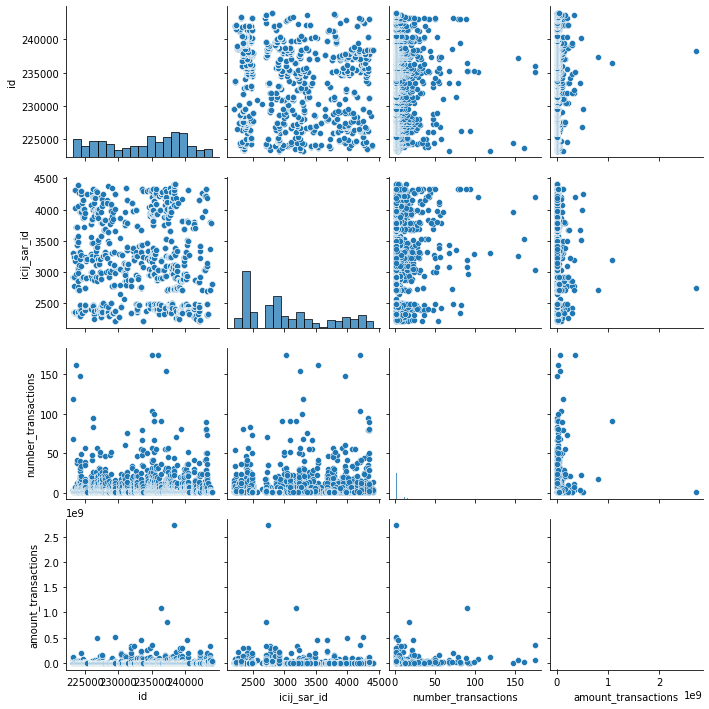

In [ ]:
sns.pairplot(df_trans)

In [ ]:
x = df_trans['amount_transactions'].values.reshape(-1,1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
sns.histplot(x_scaled)

AttributeError: ignored

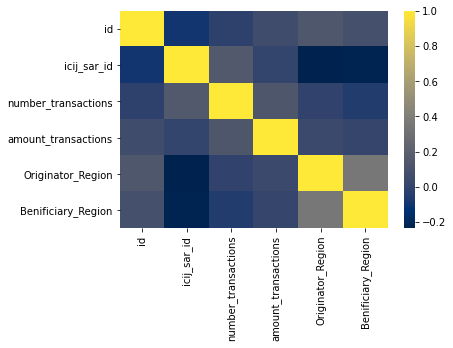

In [ ]:
from sklearn.preprocessing import LabelEncoder

corrDF = df_trans.copy()
corrDF_reg = df_reg.copy()
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
value1 = corrDF["Originator_Region"].values
value2 = corrDF["Benificiary_Region"].values
value1_encoded = encoder1.fit_transform(value1.astype('str'))   # this "fits" the labels to numerical classes
value2_encoded = encoder2.fit_transform(value1.astype('str'))   # this "fits" the labels to numerical classes
corrDF['Originator_Region'] = encoder1.fit_transform(corrDF['Originator_Region'])
corrDF['Benificiary_Region'] = encoder2.fit_transform(corrDF['Benificiary_Region'])
sns.heatmap(corrDF.corr(), cmap='cividis')
#value1_encoded
# corrDF.corr()

In [ ]:
df_trans[df_trans["Originator_Region"] == "Unknown"]["originator_bank_country"].value_counts()

Series([], Name: originator_bank_country, dtype: int64)

In [ ]:
df_trans[df_trans["Benificiary_Region"] == "Unknown"]["beneficiary_bank_country"].value_counts()

Series([], Name: beneficiary_bank_country, dtype: int64)

In [ ]:
norm = df_trans.copy()
norm["normalized"] = (norm["amount_transactions"] - norm["amount_transactions"].min())/(norm["amount_transactions"].max() - norm["amount_transactions"].min())
norm["normalized"]

0      0.02
1      0.04
2      0.00
3      0.00
4      0.00
       ... 
4502   0.01
4503   0.01
4504   0.01
4505   0.01
4506   0.01
Name: normalized, Length: 4501, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


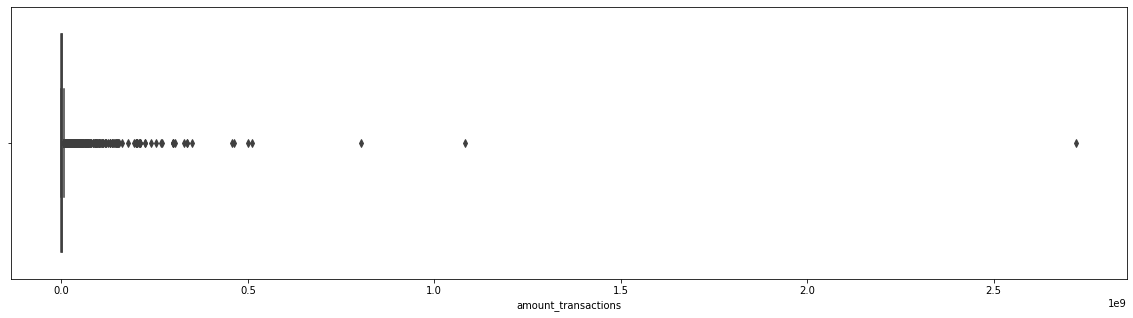

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(df_trans["amount_transactions"], orient='h')

In [ ]:
fon = df_trans["filer_org_name"].value_counts().to_frame().reset_index()
fon = fon.rename(columns={'index': 'filer_org_name', 'filer_org_name': 'number_file'})

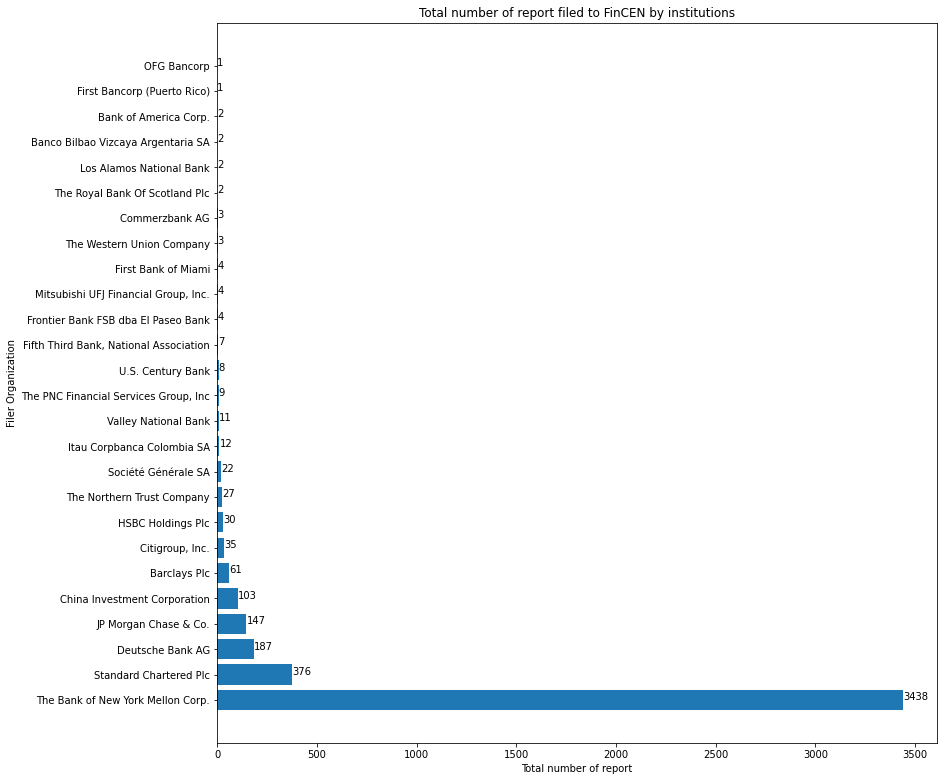

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.barh(fon["filer_org_name"],fon["number_file"])
for index, value in enumerate(fon["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Filer Organization")
ax.set_xlabel("Total number of report")
ax.set_title("Total number of report filed to FinCEN by institutions")
plt.savefig("SARs")

In [ ]:
oribank = df_trans.groupby(["originator_bank"])["amount_transactions"].sum()
oribank = oribank.to_frame()
oribank = oribank.sort_values("amount_transactions", inplace = False,ascending=False)
oribank = oribank.head(10).reset_index()
#oribank["amount_transactions"] = oribank["amount_transactions"].map('{:.2f}'.format)
oribank

,originator_bank,amount_transactions
0,Amsterdam Trade Bank NV,3157943202.12
1,AS Expobank,2666430134.11
2,Deutsche Bank AG,1653727783.18
3,ING Netherland NV,1375421435.08
4,Rigensis Bank AS,1366123530.96
5,Rosbank,1207455547.63
6,JPMorgan Chase Bank,1114866517.70
7,Gazprombank,926899916.66
8,Caledonian Bank Ltd,856543576.77
9,Societe Generale Private Banking,760041526.00


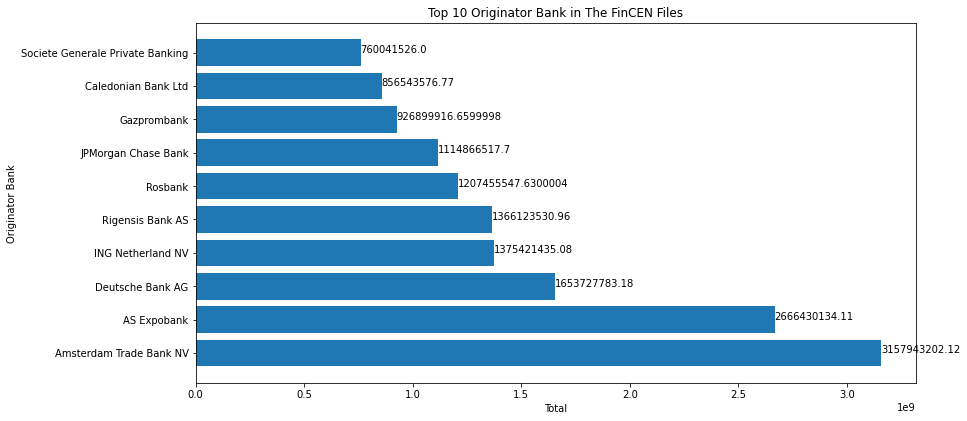

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(oribank["originator_bank"],oribank["amount_transactions"])
for index, value in enumerate(oribank["amount_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Originator Bank")
ax.set_xlabel("Total")
ax.set_title("Top 10 Originator Bank in The FinCEN Files")
plt.show()

In [ ]:
oribankRegion= df_trans[["originator_bank", "amount_transactions","Originator_Region"]]
oribankAP = oribankRegion[oribankRegion["Originator_Region"] == "Asia Pacific"]
oribankEU = oribankRegion[oribankRegion["Originator_Region"] == "Europe"]
oribankAM = oribankRegion[oribankRegion["Originator_Region"] == "Americas"]
oribankAP = oribankAP.groupby(["originator_bank"])["amount_transactions"].sum().to_frame().reset_index()
oribankEU = oribankEU.groupby(["originator_bank"])["amount_transactions"].sum().to_frame().reset_index()
oribankAM = oribankAM.groupby(["originator_bank"])["amount_transactions"].sum().to_frame().reset_index()
oribankAP = oribankAP.sort_values("amount_transactions", inplace = False,ascending=False)
oribankEU = oribankEU.sort_values("amount_transactions", inplace = False,ascending=False)
oribankAM = oribankAM.sort_values("amount_transactions", inplace = False,ascending=False)
oribankAP = oribankAP.head(10)
oribankEU = oribankEU.head(10)
oribankAM = oribankAM.head(10)
#oribank["amount_transactions"] = oribank["amount_transactions"].map('{:.2f}'.format)

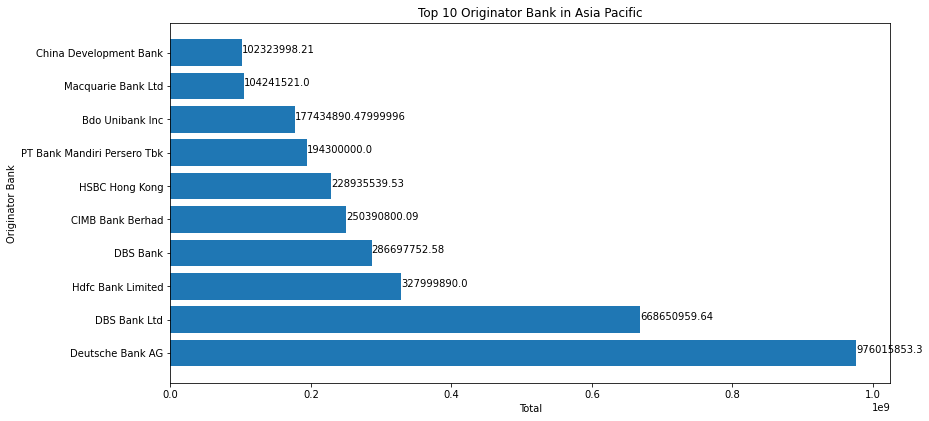

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(oribankAP["originator_bank"],oribankAP["amount_transactions"])
for index, value in enumerate(oribankAP["amount_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Originator Bank")
ax.set_xlabel("Total")
ax.set_title("Top 10 Originator Bank in Asia Pacific")
plt.show()

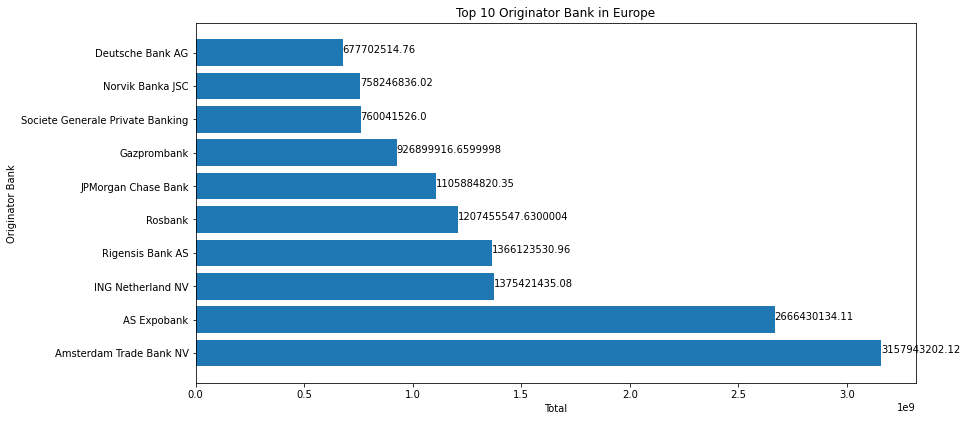

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(oribankEU["originator_bank"],oribankEU["amount_transactions"])
for index, value in enumerate(oribankEU["amount_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Originator Bank")
ax.set_xlabel("Total")
ax.set_title("Top 10 Originator Bank in Europe")
plt.show()

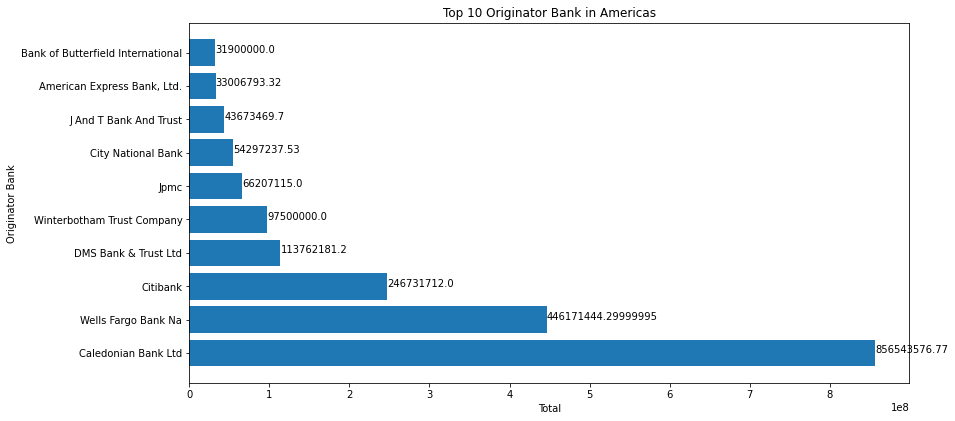

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(oribankAM["originator_bank"],oribankAM["amount_transactions"])
for index, value in enumerate(oribankAM["amount_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Originator Bank")
ax.set_xlabel("Total")
ax.set_title("Top 10 Originator Bank in Americas")
plt.show()

In [ ]:
oricountry = df_trans["originator_bank_country"].value_counts().to_frame().reset_index()
oricountry = oricountry.rename(columns={'index': 'originator_bank_country', 'originator_bank_country': 'number_file'})
oricountry = oricountry.head(10)

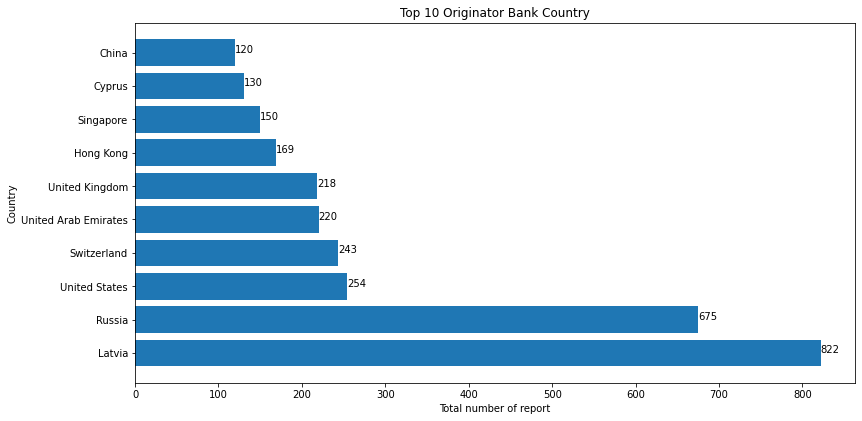

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(oricountry["originator_bank_country"],oricountry["number_file"])
for index, value in enumerate(oricountry["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Country")
ax.set_xlabel("Total number of report")
ax.set_title("Top 10 Originator Bank Country")
plt.show()

In [ ]:
oricountryRegion= df_trans[["originator_bank_country","Originator_Region"]]
oricountryAP = oricountryRegion[oricountryRegion["Originator_Region"] == "Asia Pacific"]
oricountryEU = oricountryRegion[oricountryRegion["Originator_Region"] == "Europe"]
oricountryAM = oricountryRegion[oricountryRegion["Originator_Region"] == "Americas"]
oricountryAP = oricountryAP["originator_bank_country"].value_counts().to_frame().reset_index()
oricountryEU = oricountryEU["originator_bank_country"].value_counts().to_frame().reset_index()
oricountryAM = oricountryAM["originator_bank_country"].value_counts().to_frame().reset_index()
oricountryAP = oricountryAP.rename(columns={'index': 'originator_bank_country', 'originator_bank_country': 'number_file'})
oricountryEU = oricountryEU.rename(columns={'index': 'originator_bank_country', 'originator_bank_country': 'number_file'})
oricountryAM = oricountryAM.rename(columns={'index': 'originator_bank_country', 'originator_bank_country': 'number_file'})
oricountryAP = oricountryAP.head(10)
oricountryEU = oricountryEU.head(10)
oricountryAM = oricountryAM.head(10)

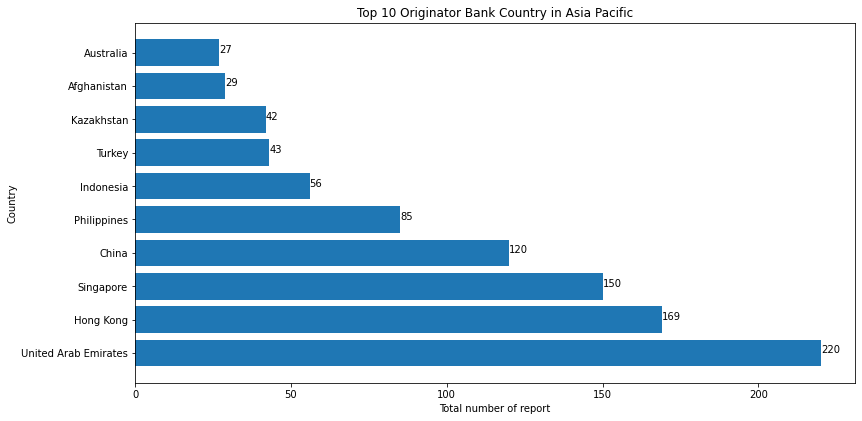

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(oricountryAP["originator_bank_country"],oricountryAP["number_file"])
for index, value in enumerate(oricountryAP["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Country")
ax.set_xlabel("Total number of report")
ax.set_title("Top 10 Originator Bank Country in Asia Pacific")
plt.show()

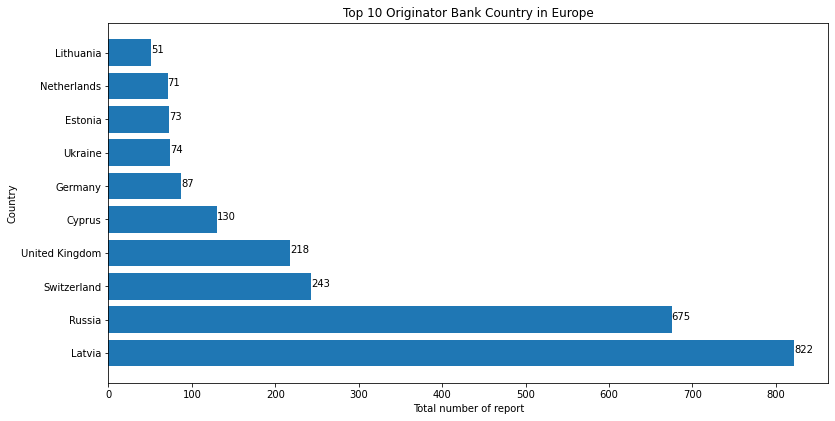

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(oricountryEU["originator_bank_country"],oricountryEU["number_file"])
for index, value in enumerate(oricountryEU["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Country")
ax.set_xlabel("Total number of report")
ax.set_title("Top 10 Originator Bank Country in Europe")
plt.show()

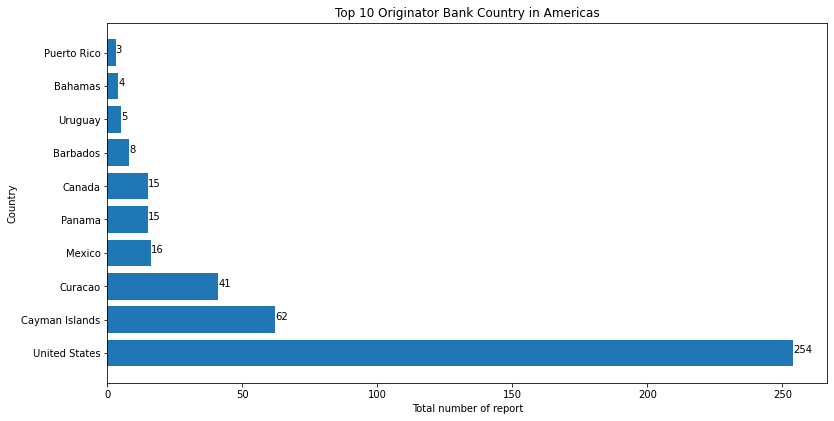

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(oricountryAM["originator_bank_country"],oricountryAM["number_file"])
for index, value in enumerate(oricountryAM["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Country")
ax.set_xlabel("Total number of report")
ax.set_title("Top 10 Originator Bank Country in Americas")
plt.show()

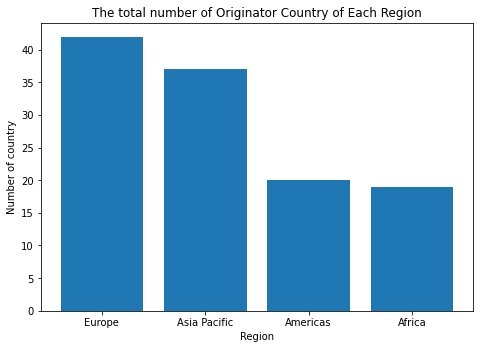

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
uc = df_trans.sort_values("originator_bank_country", inplace = False)
uc = uc.drop_duplicates(subset= "originator_bank_country")
bar1 = uc['Originator_Region'].value_counts()
bar1 = bar1.to_frame()
region = ['Europe','Asia Pacific','Americas','Africa']
ax.bar(region, bar1['Originator_Region'])
ax.set_title("The total number of Originator Country of Each Region")
ax.set_xlabel("Region")
ax.set_ylabel("Number of country")
#ax.pie(df_trans['Originator_Region'].value_counts().values, labels = df_trans['Originator_Region'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
befbank = df_trans.groupby(["beneficiary_bank"])["amount_transactions"].sum()
befbank = befbank.to_frame()
befbank = befbank.sort_values("amount_transactions", inplace = False,ascending=False)
befbank = befbank.head(10).reset_index()
befbank

,beneficiary_bank,amount_transactions
0,Rosbank,3559645309.54
1,Credit Suisse AG,2089081782.75
2,Rigensis Bank AS,1754253899.57
3,ING Netherland NV,1324026206.64
4,Deutsche Bank AG -- London Branch,1082748112.02
5,JPMorgan,881880017.38
6,Societe Generale Bank And Trust Singapore SA,860707022.51
7,Hong Kong And Shanghai Banking Corp,813175350.59
8,Bank Soyuz,805642190.61
9,Caledonian Bank Ltd,803999980.00


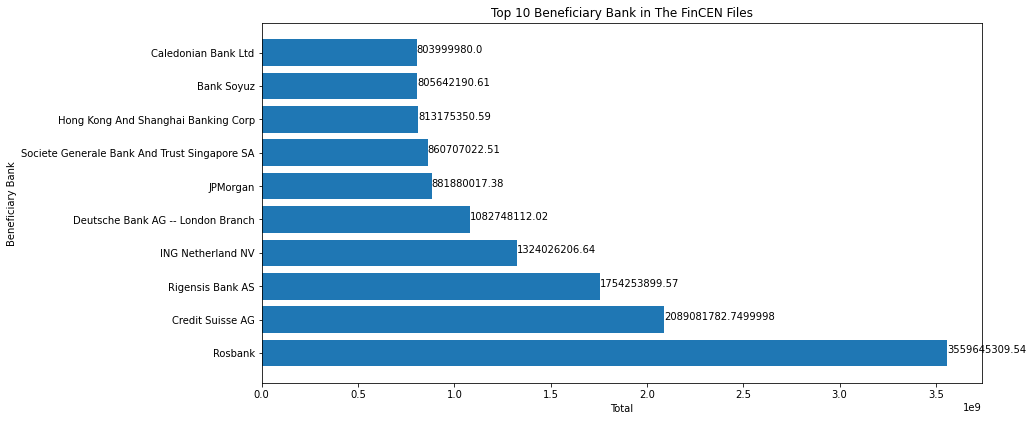

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(befbank["beneficiary_bank"],befbank["amount_transactions"])
for index, value in enumerate(befbank["amount_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Beneficiary Bank")
ax.set_xlabel("Total")
ax.set_title("Top 10 Beneficiary Bank in The FinCEN Files")
plt.show()

In [ ]:
befbankRegion= df_trans[["beneficiary_bank", "amount_transactions","Benificiary_Region"]]
befbankAP = befbankRegion[befbankRegion["Benificiary_Region"] == "Asia Pacific"]
befbankEU = befbankRegion[befbankRegion["Benificiary_Region"] == "Europe"]
befbankAM = befbankRegion[befbankRegion["Benificiary_Region"] == "Americas"]
befbankAP = befbankAP.groupby(["beneficiary_bank"])["amount_transactions"].sum().to_frame().reset_index()
befbankEU = befbankEU.groupby(["beneficiary_bank"])["amount_transactions"].sum().to_frame().reset_index()
befbankAM = befbankAM.groupby(["beneficiary_bank"])["amount_transactions"].sum().to_frame().reset_index()
befbankAP = befbankAP.sort_values("amount_transactions", inplace = False,ascending=False)
befbankEU = befbankEU.sort_values("amount_transactions", inplace = False,ascending=False)
befbankAM = befbankAM.sort_values("amount_transactions", inplace = False,ascending=False)
befbankAP = befbankAP.head(10)
befbankEU = befbankEU.head(10)
befbankAM = befbankAM.head(10)

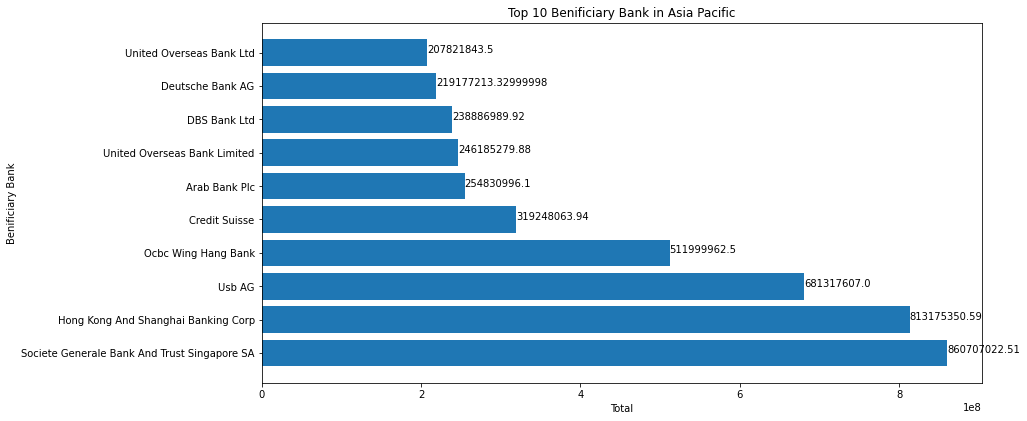

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(befbankAP["beneficiary_bank"],befbankAP["amount_transactions"])
for index, value in enumerate(befbankAP["amount_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Benificiary Bank")
ax.set_xlabel("Total")
ax.set_title("Top 10 Benificiary Bank in Asia Pacific")
plt.show()

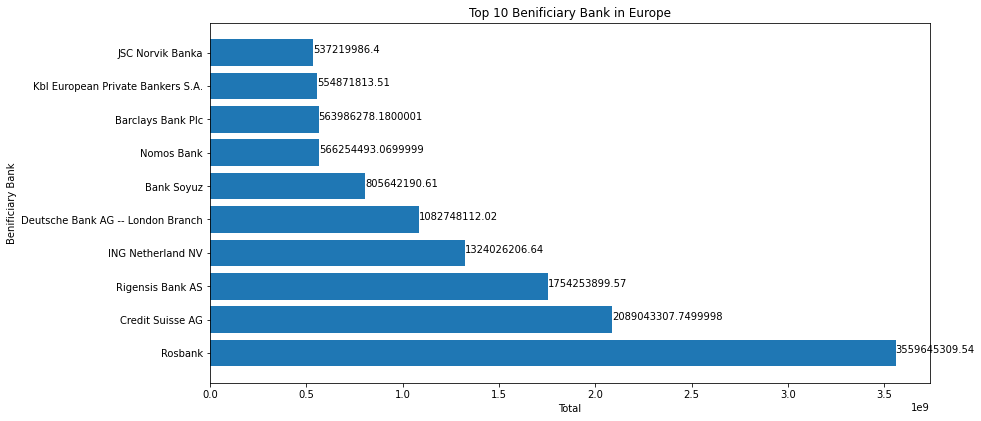

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(befbankEU["beneficiary_bank"],befbankEU["amount_transactions"])
for index, value in enumerate(befbankEU["amount_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Benificiary Bank")
ax.set_xlabel("Total")
ax.set_title("Top 10 Benificiary Bank in Europe")
plt.show()

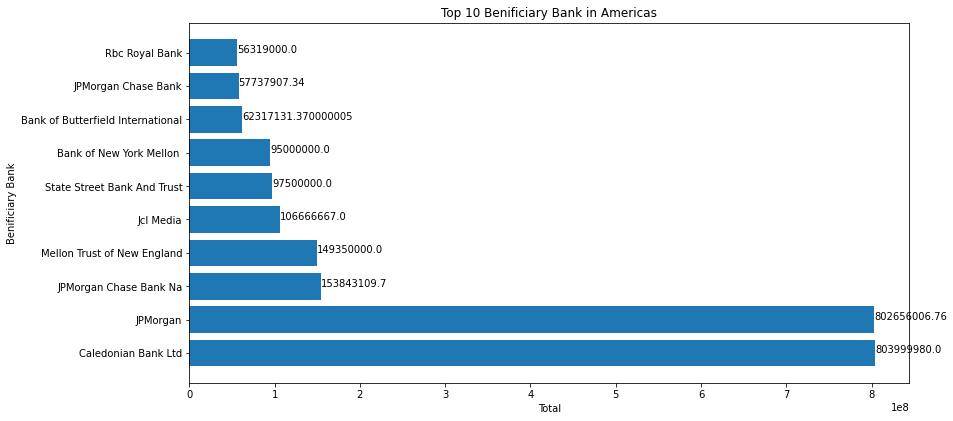

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(befbankAM["beneficiary_bank"],befbankAM["amount_transactions"])
for index, value in enumerate(befbankAM["amount_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Benificiary Bank")
ax.set_xlabel("Total")
ax.set_title("Top 10 Benificiary Bank in Americas")
plt.show()

In [ ]:
befcountry = df_trans["beneficiary_bank_country"].value_counts().to_frame().reset_index()
befcountry = befcountry.rename(columns={'index': 'beneficiary_bank_country', 'beneficiary_bank_country': 'number_file'})
befcountry = befcountry.head(10)

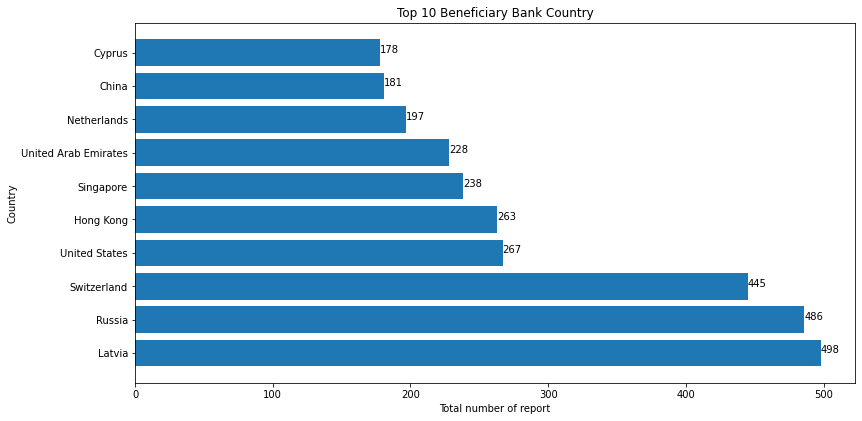

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(befcountry["beneficiary_bank_country"],befcountry["number_file"])
for index, value in enumerate(befcountry["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Country")
ax.set_xlabel("Total number of report")
ax.set_title("Top 10 Beneficiary Bank Country")
plt.show()

In [ ]:
befcountryRegion= df_trans[["beneficiary_bank_country","Benificiary_Region"]]
befcountryAP = befcountryRegion[befcountryRegion["Benificiary_Region"] == "Asia Pacific"]
befcountryEU = befcountryRegion[befcountryRegion["Benificiary_Region"] == "Europe"]
befcountryAM = befcountryRegion[befcountryRegion["Benificiary_Region"] == "Americas"]
befcountryAP = befcountryAP["beneficiary_bank_country"].value_counts().to_frame().reset_index()
befcountryEU = befcountryEU["beneficiary_bank_country"].value_counts().to_frame().reset_index()
befcountryAM = befcountryAM["beneficiary_bank_country"].value_counts().to_frame().reset_index()
befcountryAP = befcountryAP.rename(columns={'index': 'beneficiary_bank_country', 'beneficiary_bank_country': 'number_file'})
befcountryEU = befcountryEU.rename(columns={'index': 'beneficiary_bank_country', 'beneficiary_bank_country': 'number_file'})
befcountryAM = befcountryAM.rename(columns={'index': 'beneficiary_bank_country', 'beneficiary_bank_country': 'number_file'})
befcountryAP = befcountryAP.head(10)
befcountryEU = befcountryEU.head(10)
befcountryAM = befcountryAM.head(10)

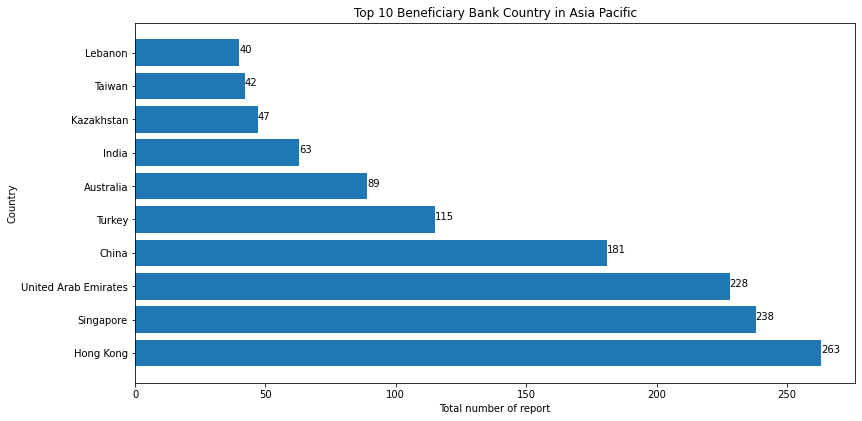

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(befcountryAP["beneficiary_bank_country"],befcountryAP["number_file"])
for index, value in enumerate(befcountryAP["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Country")
ax.set_xlabel("Total number of report")
ax.set_title("Top 10 Beneficiary Bank Country in Asia Pacific")
plt.show()

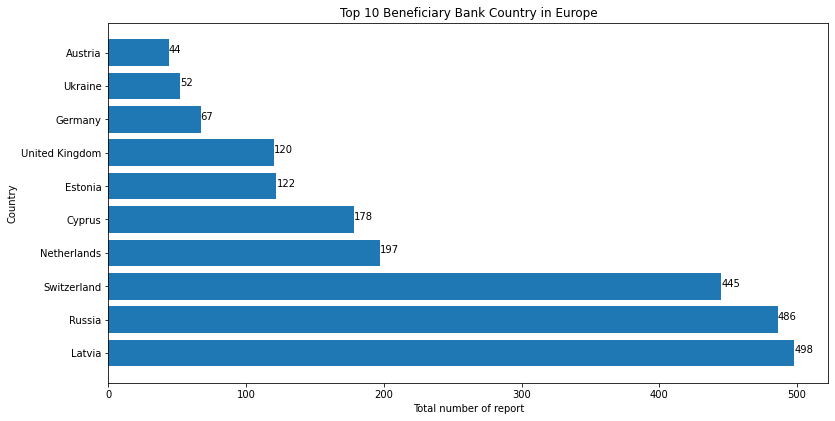

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(befcountryEU["beneficiary_bank_country"],befcountryEU["number_file"])
for index, value in enumerate(befcountryEU["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Country")
ax.set_xlabel("Total number of report")
ax.set_title("Top 10 Beneficiary Bank Country in Europe")
plt.show()

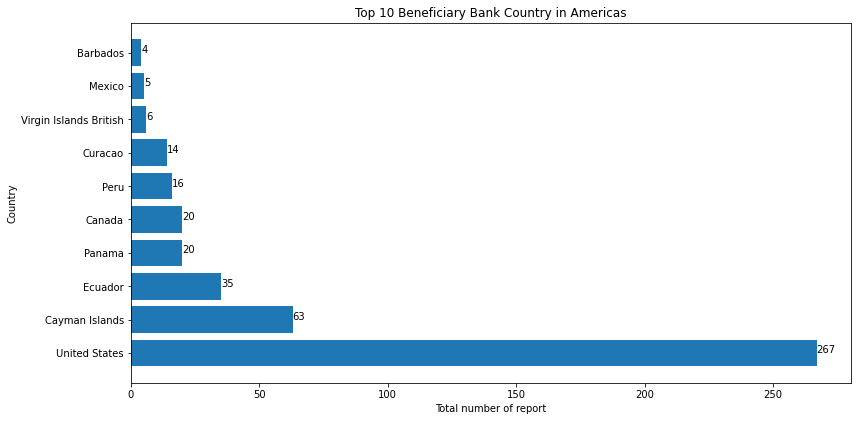

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(befcountryAM["beneficiary_bank_country"],befcountryAM["number_file"])
for index, value in enumerate(befcountryAM["number_file"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Country")
ax.set_xlabel("Total number of report")
ax.set_title("Top 10 Beneficiary Bank Country in Americas")
plt.show()

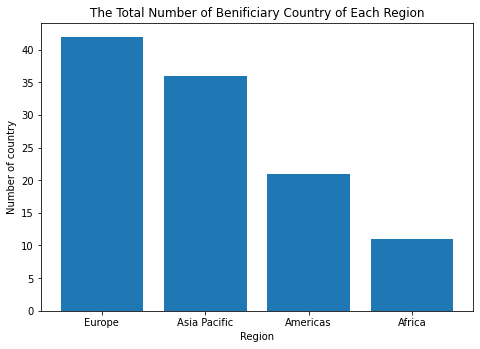

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
uc = df_trans.sort_values("beneficiary_bank_country", inplace = False)
uc = uc.drop_duplicates(subset= "beneficiary_bank_country")
bar2 = uc['Benificiary_Region'].value_counts()
bar2 = bar2.to_frame()
region = ['Europe','Asia Pacific','Americas','Africa']
ax.bar(region, bar2['Benificiary_Region'])
ax.set_title("The Total Number of Benificiary Country of Each Region")
ax.set_xlabel("Region")
ax.set_ylabel("Number of country")
#ax.pie(df_trans['Originator_Region'].value_counts().values, labels = df_trans['Originator_Region'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
nt = df_trans.groupby(['Transaction_Region'],as_index=False).agg({'number_transactions':'sum','Transaction_Region':'first'})
nt = nt.sort_values("number_transactions", inplace=False, ascending=False)

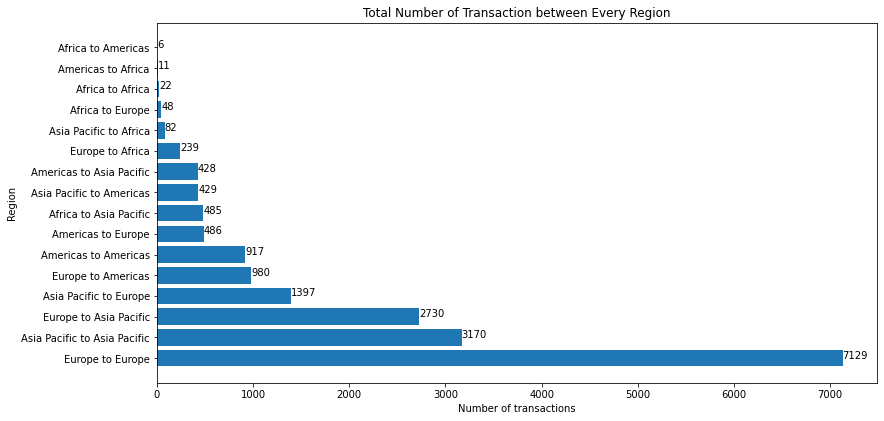

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(nt["Transaction_Region"],nt["number_transactions"])
for index, value in enumerate(nt["number_transactions"]):
    plt.text(value, index, str(value))
ax.set_ylabel("Region")
ax.set_xlabel("Number of transactions")
ax.set_title("Total Number of Transaction between Every Region")
plt.show()

In [ ]:
df_trans_ori = df_trans.groupby(['Transaction_Region'],as_index=False).agg({'amount_transactions':'sum','Transaction_Region':'first'})
df_trans_ori["Percentage"] = ((df_trans_ori["amount_transactions"]/df_trans_ori["amount_transactions"].sum())*100).round(decimals=2)
df_trans_ori = df_trans_ori.sort_values("Percentage", inplace=False, ascending=False)

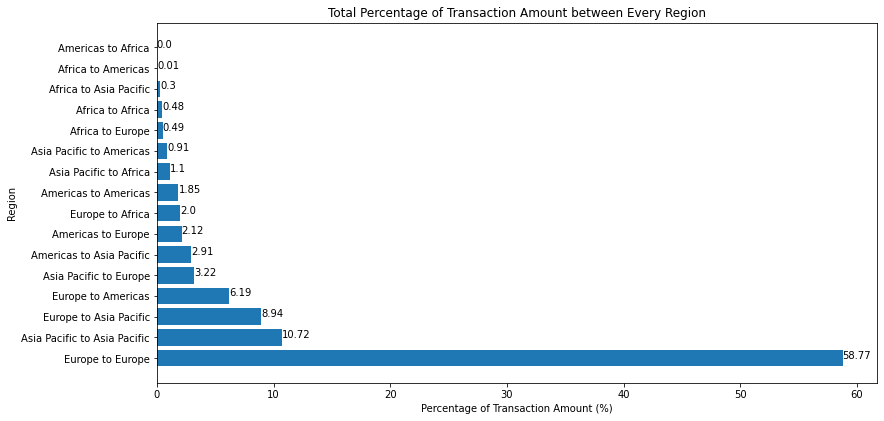

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(df_trans_ori["Transaction_Region"],df_trans_ori["Percentage"])
ax.set_ylabel("Region")
ax.set_xlabel("Percentage of Transaction Amount (%)")
for index, value in enumerate(df_trans_ori["Percentage"]):
    plt.text(value, index, str(value))
ax.set_title("Total Percentage of Transaction Amount between Every Region")
plt.show()

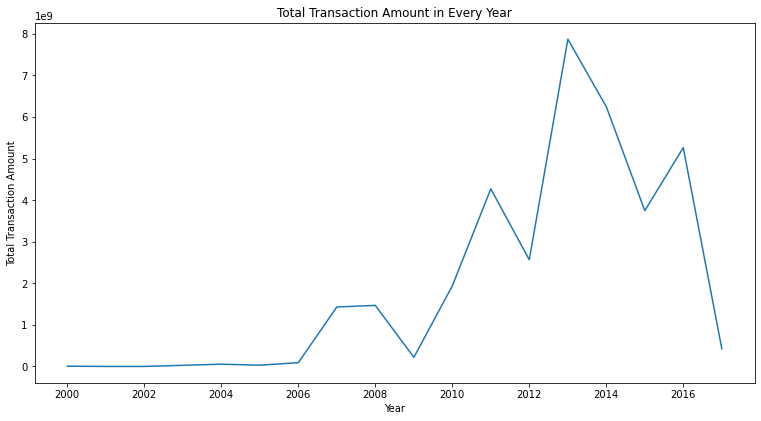

In [ ]:
tranYear = df_trans.groupby(['transaction_year'])["amount_transactions"].sum().to_frame().reset_index()
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(tranYear['transaction_year'], tranYear['amount_transactions'])
ax.set_xlabel("Year")
ax.set_ylabel("Total Transaction Amount")
ax.set_title("Total Transaction Amount in Every Year")
plt.show()

In [ ]:
tranYear2011 = df_trans[df_trans['transaction_year'] == '2011-01-01']
tranYear2011 = tranYear2011.groupby(['Transaction_Region'])['amount_transactions'].sum().to_frame().reset_index()
tranYear2011 = tranYear2011.sort_values('amount_transactions', ascending=False)
tranYear2011

,Transaction_Region,amount_transactions
12,Europe to Europe,3779263196.82
0,Africa to Africa,132139958.00
7,Asia Pacific to Asia Pacific,87208290.97
10,Europe to Americas,83659508.50
11,Europe to Asia Pacific,66880967.07
8,Asia Pacific to Europe,62971933.52
5,Americas to Europe,39321047.52
1,Africa to Asia Pacific,9854642.00
9,Europe to Africa,6450855.17
3,Americas to Americas,2064293.12


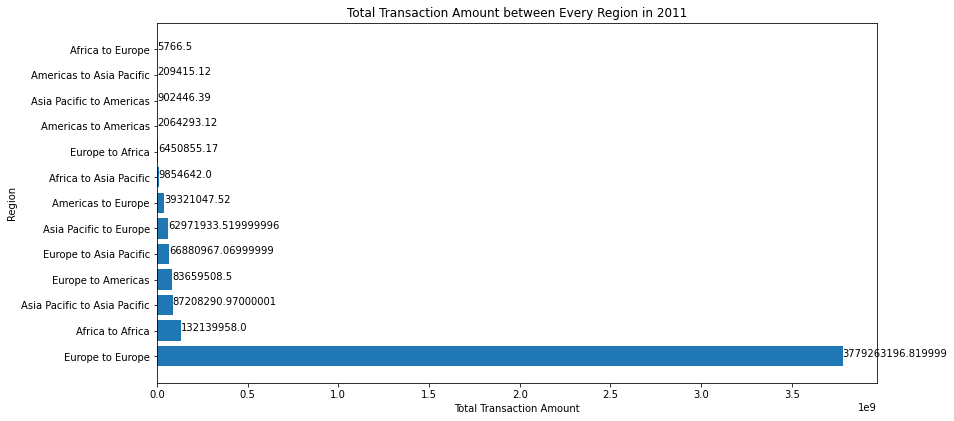

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(tranYear2011['Transaction_Region'], tranYear2011['amount_transactions'])
for index, value in enumerate(tranYear2011['amount_transactions']):
    plt.text(value, index, str(value))
ax.set_ylabel("Region")
ax.set_xlabel("Total Transaction Amount")
ax.set_title("Total Transaction Amount between Every Region in 2011")
plt.show()

In [ ]:
df_reg['12.22 Is there a specialized department in your agency dealing with financial stability and systemic supervision?'].value_counts().values

array([89, 43, 10])

In [ ]:
df_supervisor = df_reg[['Country','Region','12.22 Is there a specialized department in your agency dealing with financial stability and systemic supervision?']]
df_supervisor.loc[:,'Have a specialized department in your agency dealing with financial stability and systemic supervision'] = pd.get_dummies(df_supervisor['12.22 Is there a specialized department in your agency dealing with financial stability and systemic supervision?'])['Yes']
df_supervisor.loc[:,'Dont Have a specialized department in your agency dealing with financial stability and systemic supervision'] = pd.get_dummies(df_supervisor['12.22 Is there a specialized department in your agency dealing with financial stability and systemic supervision?'])['No']
df_supervisor = df_supervisor[['Region','Have a specialized department in your agency dealing with financial stability and systemic supervision','Dont Have a specialized department in your agency dealing with financial stability and systemic supervision']].groupby('Region', as_index=False).sum()

# df_supervisor = df_supervisor[['Country','Region','12.22 Is there a specialized department in your agency dealing with financial stability and systemic supervision?']].groupby('Country', as_index=False).sum()
# df_supervisor.loc[:,'Have a specialized department in your agency dealing with financial stability and systemic supervision'] = pd.get_dummies(df_supervisor['12.22 Is there a specialized department in your agency dealing with financial stability and systemic supervision?'])['Yes']
# df_supervisor.loc[:,'Dont Have a specialized department in your agency dealing with financial stability and systemic supervision'] = pd.get_dummies(df_supervisor['12.22 Is there a specialized department in your agency dealing with financial stability and systemic supervision?'])['No']
df_supervisor

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Region,Have a specialized department in your agency dealing with financial stability and systemic supervision,Dont Have a specialized department in your agency dealing with financial stability and systemic supervision
0,Africa,24,8
1,Americas,17,10
2,Asia Pacific,23,9
3,Europe,25,16


In [ ]:
df_supervisor['Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index

UInt64Index([23, 25, 17, 24], dtype='uint64')

In [ ]:
df_supervisor.columns[1:]

Index(['Have a specialized department in your agency dealing with financial stability and systemic supervision', 'Dont Have a specialized department in your agency dealing with financial stability and systemic supervision'], dtype='object')

In [ ]:
# ax = sns.barplot(x=df_supervisor[['Have a specialized department in your agency dealing with financial stability and systemic supervision', 'Dont Have a specialized department in your agency dealing with financial stability and systemic supervision']].value_counts().index, y=df_supervisor['Is there a specialized department in your agency dealing with financial stability and systemic supervision?'],hue="Region",data=df_supervisor).set_title("Is there a specialized department in your agency dealing with financial stability and systemic supervision?'")

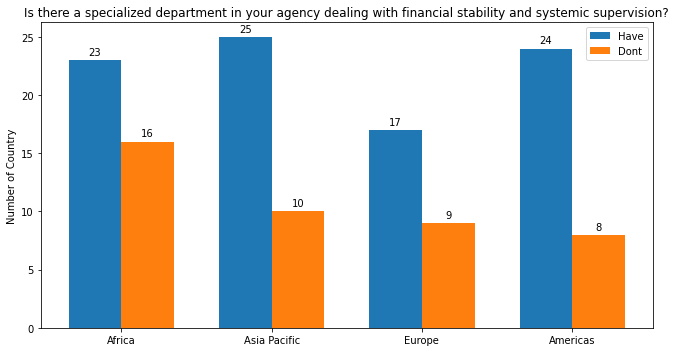

In [ ]:
# ax = sns.barplot(x=df_supervisor.columns[1:], y=[df_supervisor['Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index, df_supervisor['Dont Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index], hue="Region", data=df_supervisor)
labels = df_supervisor['Region'].value_counts().index
supervisor_have = df_supervisor['Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index.tolist()
supervisor_dhave = df_supervisor['Dont Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index.tolist()
supervisor_dhave
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
# x
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, supervisor_have, width, label='Have')
rects2 = ax.bar(x + width/2, supervisor_dhave, width, label='Dont')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Country')
ax.set_title('Is there a specialized department in your agency dealing with financial stability and systemic supervision?')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
df_supervisor_total = df_reg[['Country','Region','12.30 How many professional bank supervisors are there in total (excluding all support functions and management)?']]
df_supervisor_total = df_supervisor_total.replace('---', 0)
df_supervisor_total = df_supervisor_total.fillna(df_supervisor_total.mean())
df_supervisor_total['12.30 How many professional bank supervisors are there in total (excluding all support functions and management)?'] =df_supervisor_total['12.30 How many professional bank supervisors are there in total (excluding all support functions and management)?'].astype('str')
df_supervisor_total['Average Number of Professional Bank Supervisors'] = df_supervisor_total['12.30 How many professional bank supervisors are there in total (excluding all support functions and management)?'].str.extract('(\d+)').astype(int)
df_supervisor_total = df_supervisor_total[['Region','Average Number of Professional Bank Supervisors']].groupby('Region', as_index=False).mean()
df_supervisor_total



,Region,Average Number of Professional Bank Supervisors
0,Africa,63.78
1,Americas,194.85
2,Asia Pacific,139.32
3,Europe,196.29


In [ ]:
df_supervisor_specialized = df_reg[['Country','Region','12.31 Of those, how many are specialized in specific bank functions (e.g. IT, Treasury) or risks (e.g. credit / market / operational risk)?']]
df_supervisor_specialized['Number of bank specialized in specific bank functions'] = df_supervisor_specialized.iloc[:,2]
df_supervisor_specialized = df_supervisor_specialized.fillna(0)
df_supervisor_specialized = df_supervisor_specialized.replace('NaN', 0)
df_supervisor_specialized.loc[:,'Number of bank specialized in specific bank functions'] = pd.to_numeric(df_supervisor_specialized.loc[:,'Number of bank specialized in specific bank functions'], errors='coerce')
df_supervisor_specialized.drop(df_supervisor_specialized.columns[2],axis=1, inplace=True)
df_supervisor_specialized = df_supervisor_specialized[['Region','Number of bank specialized in specific bank functions']].groupby('Region', as_index=False).mean()
df_supervisor_specialized

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Region,Number of bank specialized in specific bank functions
0,Africa,20.72
1,Americas,58.73
2,Asia Pacific,36.55
3,Europe,22.25


No handles with labels found to put in legend.


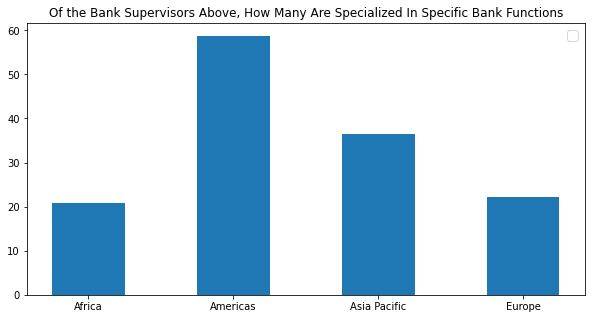

In [ ]:
f, ax = plt.subplots(figsize=(10,5)) 
plt.bar(df_supervisor_specialized.Region.values.tolist(), df_supervisor_specialized['Number of bank specialized in specific bank functions'].values.tolist(),width=0.5)
plt.title('Of the Bank Supervisors Above, How Many Are Specialized In Specific Bank Functions')
ax.legend(fontsize = 14)

No handles with labels found to put in legend.


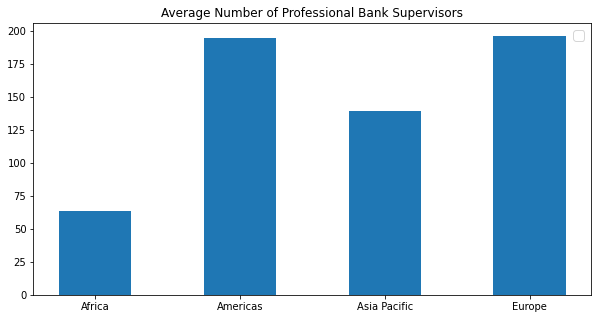

In [ ]:
f, ax = plt.subplots(figsize=(10,5)) 
plt.bar(df_supervisor_total.Region.values.tolist(), df_supervisor_total['Average Number of Professional Bank Supervisors'].values.tolist(),width=0.5)
plt.title('Average Number of Professional Bank Supervisors')
ax.legend(fontsize = 14)

In [ ]:
df_supervisor_training = df_reg[['Country','Region','12.34 How many hours of training (at the supervisory agency or elsewhere) on average have supervisors had in the last year?']]
df_supervisor_training.loc[:,'Average Taining Hours of Professional Bank Supervisors'] = df_supervisor_training.iloc[:,2]
df_supervisor_training.drop(df_supervisor_training.columns[2],axis=1, inplace=True)
df_supervisor_training = df_supervisor_training.replace('---', 0)
df_supervisor_training = df_supervisor_training.replace('NaN', 0)
df_supervisor_training = df_supervisor_training.fillna(0)
df_supervisor_training.loc[:,'Average Taining Hours of Professional Bank Supervisors'] = pd.to_numeric(df_supervisor_training.loc[:,'Average Taining Hours of Professional Bank Supervisors'], errors='coerce')
df_supervisor_training = df_supervisor_training[['Region','Average Taining Hours of Professional Bank Supervisors']].groupby('Region', as_index=False).mean()
df_supervisor_training.rename(columns={'Average Taining Hours of Professional Bank Supervisors': 'Average Training Hours of Professional Bank Supervisors'})


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

,Region,Average Training Hours of Professional Bank Supervisors
0,Africa,265.16
1,Americas,44.92
2,Asia Pacific,266.66
3,Europe,165.06


No handles with labels found to put in legend.


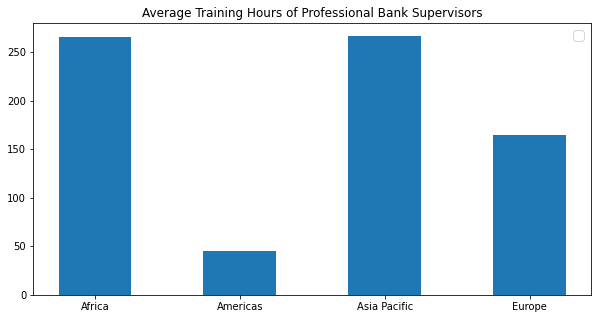

In [ ]:
f, ax = plt.subplots(figsize=(10,5)) 
plt.bar(df_supervisor_training.Region.values.tolist(), df_supervisor_training['Average Taining Hours of Professional Bank Supervisors'].values.tolist(),width=0.5)
plt.title('Average Training Hours of Professional Bank Supervisors')
ax.legend(fontsize = 14)

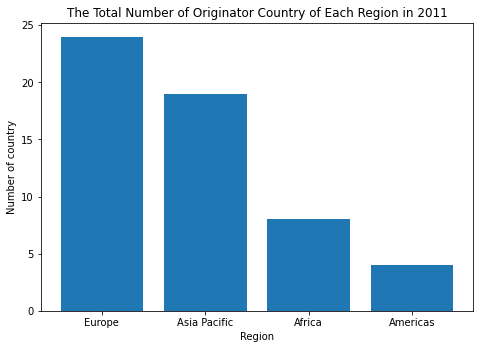

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ori2011 = df_trans[df_trans['transaction_year'] == '2011-01-01']
ori2011 = ori2011.drop_duplicates(subset= "originator_bank_country")
ori2011 = ori2011['Originator_Region'].value_counts()
ori2011 = ori2011.to_frame()
region = ['Europe','Asia Pacific','Africa','Americas']
ax.bar(region, ori2011['Originator_Region'])
ax.set_title("The Total Number of Originator Country of Each Region in 2011")
ax.set_xlabel("Region")
ax.set_ylabel("Number of country")
plt.show()

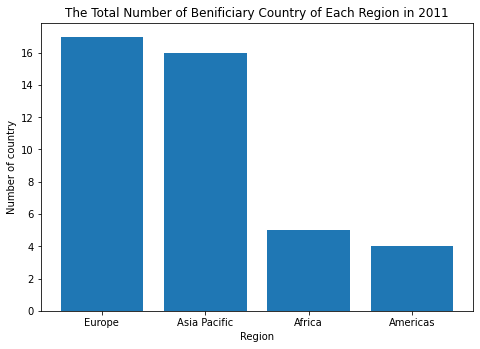

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bef2011 = df_trans[df_trans['transaction_year'] == '2011-01-01']
bef2011 = bef2011.drop_duplicates(subset= "beneficiary_bank_country")
bef2011 = bef2011['Benificiary_Region'].value_counts()
bef2011 = bef2011.to_frame()
region = ['Europe','Asia Pacific','Africa','Americas']
ax.bar(region, bef2011['Benificiary_Region'])
ax.set_title("The Total Number of Benificiary Country of Each Region in 2011")
ax.set_xlabel("Region")
ax.set_ylabel("Number of country")
plt.show()

## Q2 Which country sent the most amount of money to other countries to indicate that the country may have higher chances of people generating illegal incomes from various illegal activities.


In [ ]:
df_trans.head()

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions,transaction_year,Originator_Region,Benificiary_Region,Transaction_Region
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 25, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68,56898523.47,2015-01-01,Asia Pacific,Europe,Asia Pacific to Europe
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 30, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118,116238361.25,2015-01-01,Asia Pacific,Europe,Asia Pacific to Europe
2,223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jul 5, 2012","Jul 5, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4,5000.00,2012-01-01,Europe,Europe,Europe to Europe
3,223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jun 20, 2012","Jun 20, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4,9990.00,2012-01-01,Europe,Europe,Europe to Europe
4,223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"May 31, 2012","May 31, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,4,12000.00,2012-01-01,Europe,Europe,Europe to Europe


In [ ]:
df_trans.sort_values(by='amount_transactions', ascending=False, na_position='first')

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions,transaction_year,Originator_Region,Benificiary_Region,Transaction_Region
3322,238294,2748,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Aug 8, 2011","Aug 8, 2011",amsterdam-trade-bank-nv,Amsterdam Trade Bank NV,Netherlands,NLD,rosbank-moscow-russia-rus,Rosbank,Russia,RUS,1,2721000000.00,2011-01-01,Europe,Europe,Europe to Europe
2715,236396,3190,jp-morgan-chase-co,JP Morgan Chase & Co.,"Jan 8, 2007","Jan 4, 2013",jpmorgan-chase-bank,JPMorgan Chase Bank,United Kingdom,GBR,deutsche-bank-ag-london-branch-gbr,Deutsche Bank AG -- London Branch,United Kingdom,GBR,90,1082748112.02,2007-01-01,Europe,Europe,Europe to Europe
2908,237303,2713,deutsche-bank-ag,Deutsche Bank AG,"May 23, 2013","Feb 24, 2016",gazprombank,Gazprombank,Switzerland,CHE,jp-morgan-us-usa,JPMorgan,United States,USA,18,802656006.76,2013-01-01,Europe,Americas,Europe to Americas
1417,229506,4251,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Dec 11, 2015","Dec 11, 2015",jpmorgan-chase-bank-national,JPMorgan Chase Bank National,Belgium,BEL,ocbc-wing-hang-bank-hong-kong-hkg,Ocbc Wing Hang Bank,Hong Kong,HKG,1,511999962.50,2015-01-01,Europe,Asia Pacific,Europe to Asia Pacific
807,226760,3991,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Oct 20, 2015","Oct 20, 2015",bank-of-china,Bank of China,Luxembourg,LUX,kbl-european-private-bankers-sa-luxembourg-lux,Kbl European Private Bankers S.A.,Luxembourg,LUX,1,500000000.00,2015-01-01,Europe,Europe,Europe to Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,240388,2357,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jan 28, 2011","Jan 28, 2011",ltb-bank,LTB Bank,Latvia,LVA,vnesheconombank-moscow-russia-rus,Vnesheconombank,Russia,RUS,1,23.60,2011-01-01,Europe,Europe,Europe to Europe
3604,239109,2382,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Oct 30, 2012","Oct 30, 2012",ltb-bank-riga,LTB Bank Riga,Latvia,LVA,vnesheconombank-moscow-russia-rus,Vnesheconombank,Russia,RUS,1,16.04,2012-01-01,Europe,Europe,Europe to Europe
4094,240389,2357,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jan 28, 2011","Jan 28, 2011",ltb-bank,LTB Bank,Latvia,LVA,vnesheconombank-moscow-russia-rus,Vnesheconombank,Russia,RUS,1,11.80,2011-01-01,Europe,Europe,Europe to Europe
4228,241861,2331,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Oct 17, 2007","Oct 17, 2007",joint-stock-bank-big-energy,Joint Stock Bank Big Energy,Ukraine,UKR,vnesheconombank-russia-rus,Vnesheconombank,Russia,RUS,1,7.14,2007-01-01,Europe,Europe,Europe to Europe


In [ ]:
Most_Ori_Country = df_trans.sort_values(by='amount_transactions', ascending=False, na_position='first').loc[0,'originator_bank_country']
Most_Ori_Country

'Singapore'

In [ ]:
Most_Ori_Country = df_trans.groupby(['originator_bank_country'], as_index=False).sum().sort_values(by='amount_transactions', ascending=False, na_position='first')['originator_bank_country'].iloc[0]
Most_Ori_Amount =df_trans.groupby(['originator_bank_country'], as_index=False).sum().sort_values(by='amount_transactions', ascending=False, na_position='first')['amount_transactions'].iloc[0]
Most_Ori_Amount = Most_Ori_Amount.round(decimals=2)

print ('The country the sents out most the suspicious transaction is', Most_Ori_Country, 'with the amount of $', Most_Ori_Amount)

The country the sents out most the suspicious transaction is Latvia with the amount of $ 6435881779.03


## Q3. Which financial institution filed the most number of SARs to the US authorities?

In [ ]:
# df_trans
# df_trans.groupby(['filer_org_name_id', 'filer_org_name'], as_index=False).count()
Most_SARs_Inst = df_trans['filer_org_name'].value_counts().index[0]
Most_SARs_Num = df_trans['filer_org_name'].value_counts().values[0]

print ('The financial institution the files the most the suspicious transaction is', Most_SARs_Inst,'with', Most_SARs_Num, 'filings')

The financial institution the files the most the suspicious transaction is The Bank of New York Mellon Corp. with 3438 filings


## Q4. Would the quality of the Audit Committee play a role in controlling the money laundering activities in Asia-Pacific, Europe and Americas for the year 2011? *The quality of the audit committee is measured by the experience of the audit committee, the requirement of the audit committee, etc.

In [ ]:
df_auditor_required = df_reg[['Country','Region','5.1 Is an audit by a professional external auditor required for all commercial banks in your jurisdiction?']]
df_auditor_required.loc[:,'Audit by a professional external auditor required for all commercial banks in your jurisdiction'] = pd.get_dummies(df_auditor_required['5.1 Is an audit by a professional external auditor required for all commercial banks in your jurisdiction?'])['Yes']
df_auditor_required.loc[:,'Audit by a professional external auditor not required for all commercial banks in your jurisdiction'] = pd.get_dummies(df_auditor_required['5.1 Is an audit by a professional external auditor required for all commercial banks in your jurisdiction?'])['---']
df_auditor_required = df_auditor_required[['Region','Audit by a professional external auditor required for all commercial banks in your jurisdiction','Audit by a professional external auditor not required for all commercial banks in your jurisdiction']].groupby('Region', as_index=False).sum()
df_auditor_required

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Region,Audit by a professional external auditor required for all commercial banks in your jurisdiction,Audit by a professional external auditor not required for all commercial banks in your jurisdiction
0,Africa,32,0
1,Americas,27,0
2,Asia Pacific,40,1
3,Europe,42,0


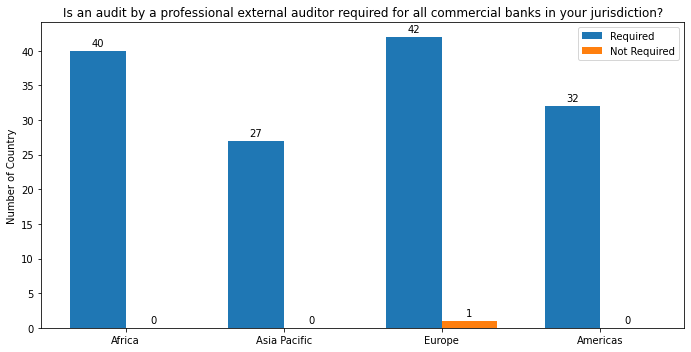

In [ ]:
# ax = sns.barplot(x=df_supervisor.columns[1:], y=[df_supervisor['Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index, df_supervisor['Dont Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index], hue="Region", data=df_supervisor)
labels = df_auditor_required['Region'].value_counts().index
auditor_required = df_auditor_required['Audit by a professional external auditor required for all commercial banks in your jurisdiction'].value_counts().index.tolist()
auditor_nrequired = df_auditor_required['Audit by a professional external auditor not required for all commercial banks in your jurisdiction'].values.tolist()
# auditor_nrequired
# df_auditor_required['Audit by a professional external auditor not required for all commercial banks in your jurisdiction'].values# 
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
# x
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, auditor_required, width, label='Required')
rects2 = ax.bar(x + width/2, auditor_nrequired, width, label='Not Required')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Country')
ax.set_title('Is an audit by a professional external auditor required for all commercial banks in your jurisdiction?')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

If yes to above graph then 

In [ ]:
df_auditor_cert = df_reg[['Country','Region','a. Obtain a professional certification or pass a specific exam to qualify as such']]
df_auditor_cert.loc[:,'Obtain a professional certification or pass a specific exam to qualify as such'] = pd.get_dummies(df_auditor_cert['a. Obtain a professional certification or pass a specific exam to qualify as such'])['Yes']
df_auditor_cert.loc[:,'Did not obtain a professional certification or pass a specific exam to qualify as such'] = pd.get_dummies(df_auditor_cert['a. Obtain a professional certification or pass a specific exam to qualify as such'])['---']
df_auditor_cert = df_auditor_cert[['Region','Obtain a professional certification or pass a specific exam to qualify as such','Did not obtain a professional certification or pass a specific exam to qualify as such']].groupby('Region', as_index=False).sum()
df_auditor_cert

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Region,Obtain a professional certification or pass a specific exam to qualify as such,Did not obtain a professional certification or pass a specific exam to qualify as such
0,Africa,30,2
1,Americas,21,2
2,Asia Pacific,40,1
3,Europe,39,1


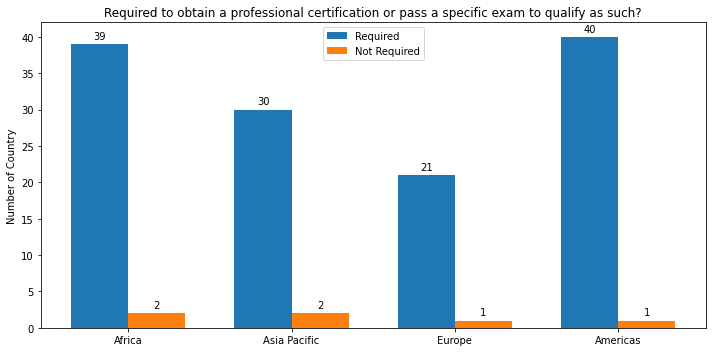

In [ ]:
# ax = sns.barplot(x=df_supervisor.columns[1:], y=[df_supervisor['Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index, df_supervisor['Dont Have a specialized department in your agency dealing with financial stability and systemic supervision'].value_counts().index], hue="Region", data=df_supervisor)
labels = df_auditor_cert['Region'].value_counts().index
cert_required = df_auditor_cert['Obtain a professional certification or pass a specific exam to qualify as such'].value_counts().index.tolist()
cert_nrequired = df_auditor_cert['Did not obtain a professional certification or pass a specific exam to qualify as such'].values.tolist()
# auditor_nrequired
# df_auditor_required['Audit by a professional external auditor not required for all commercial banks in your jurisdiction'].values# 
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
# x
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, cert_required, width, label='Required')
rects2 = ax.bar(x + width/2, cert_nrequired, width, label='Not Required')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Country')
ax.set_title('Required to obtain a professional certification or pass a specific exam to qualify as such?')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

## Q5. Which country received the highest amount of money to indicate that the country may have a weak financial system or bank regulation to prevent money laundering activities.

In [ ]:
Most_Beneficiary_Country = df_trans.groupby(['beneficiary_bank_country'], as_index=False).sum().sort_values(by='amount_transactions', ascending=False, na_position='first')['beneficiary_bank_country'].iloc[0]
Most_Beneficiary_Amount =df_trans.groupby(['beneficiary_bank_country'], as_index=False).sum().sort_values(by='amount_transactions', ascending=False, na_position='first')['amount_transactions'].iloc[0]

print ('The country the receives the most the suspicious transaction is', Most_Beneficiary_Country, 'with the amount of $', Most_Beneficiary_Amount)

The country the receives the most the suspicious transaction is Russia with the amount of $ 7279860887.84


In [ ]:
df_auditor_required

,Region,Audit by a professional external auditor required for all commercial banks in your jurisdiction,Audit by a professional external auditor not required for all commercial banks in your jurisdiction
0,Africa,32,0
1,Americas,27,0
2,Asia Pacific,40,1
3,Europe,42,0


## Q6. Are money laundering activities most likely to happen in countries without pre-prevention of financial crime (anti-money laundering/financing of terrorism) ?

In [ ]:
df_model = df_reg[["Country", "Region"]]
df_model["Prevention of financial crime"] = df_reg[["d.Prevention of financial crime (anti-money laundering / combating financing of terrorism)"]]
df_model["Audited by a professional external auditor"] = df_reg[['5.1 Is an audit by a professional external auditor required for all commercial banks in your jurisdiction?']]
df_model["Auditor Obtained Professional Certification"] = df_reg[['a. Obtain a professional certification or pass a specific exam to qualify as such']]
# df_model["Average Taining Hours of Professional Bank Supervisors"] = df_reg[['12.34 How many hours of training (at the supervisory agency or elsewhere) on average have supervisors had in the last year?']]
# df_model["Average Taining Hours of Professional Bank Supervisors"].replace('---', 0, inplace=True)
df_model["Have specialized department dealing with financial stability and systemic supervision"] = df_reg[["12.22 Is there a specialized department in your agency dealing with financial stability and systemic supervision?"]]
df_model["Transaction Amount"] = df_trans[["amount_transactions"]]
highest_transaction_amount = df_model.sort_values(by='Transaction Amount', ascending=False, na_position='first').reset_index()["Transaction Amount"][0]
df_model.replace('---','No',inplace=True)
df_model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Country,Region,Prevention of financial crime,Audited by a professional external auditor,Auditor Obtained Professional Certification,Have specialized department dealing with financial stability and systemic supervision,Transaction Amount
0,ANGOLA,Africa,Yes,Yes,Yes,Yes,56898523.47
1,ARGENTINA,Americas,Yes,Yes,Yes,Yes,116238361.25
2,ARMENIA,Asia Pacific,Yes,Yes,Yes,Yes,5000.00
3,AUSTRALIA,Asia Pacific,No,Yes,Yes,No,9990.00
4,AUSTRIA,Europe,Yes,Yes,Yes,Yes,12000.00
...,...,...,...,...,...,...,...
137,VANUATU,Asia Pacific,Yes,Yes,Yes,Yes,4913.00
138,"VENEZUELA, BOLIVARIAN REPUBLIC OF",Americas,Yes,Yes,No,Yes,2963.00
139,"VIRGIN ISLANDS, BRITISH",Americas,Yes,Yes,Yes,No,2463.00
140,YEMEN,Asia Pacific,No,Yes,Yes,No,2963.00


In [ ]:
# First quartile (Q1) 
Q1 = np.percentile(df_model["Transaction Amount"], 25, interpolation = 'midpoint') 
# Second quartile (Q2) 
Q2 = np.percentile(df_model["Transaction Amount"], 50, interpolation = 'midpoint') 
# Third quartile (Q3) 
Q3 = np.percentile(df_model["Transaction Amount"], 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
IQR

18406.5

In [ ]:
# df_model = df.assign(Transaction_Amount_level=lambda x: "High" if x['Transaction Amount'] > Q3)
bins = [0,Q1,Q3,highest_transaction_amount]
labels=["Low","Medium","High"]
df_model["Transaction Amount Level"] = pd.cut(df_model['Transaction Amount'], bins=bins, labels=labels) 
df_model



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country,Region,Prevention of financial crime,Audited by a professional external auditor,Auditor Obtained Professional Certification,Have specialized department dealing with financial stability and systemic supervision,Transaction Amount,Transaction Amount Level
0,ANGOLA,Africa,Yes,Yes,Yes,Yes,56898523.47,High
1,ARGENTINA,Americas,Yes,Yes,Yes,Yes,116238361.25,High
2,ARMENIA,Asia Pacific,Yes,Yes,Yes,Yes,5000.00,Medium
3,AUSTRALIA,Asia Pacific,No,Yes,Yes,No,9990.00,Medium
4,AUSTRIA,Europe,Yes,Yes,Yes,Yes,12000.00,Medium
...,...,...,...,...,...,...,...,...
137,VANUATU,Asia Pacific,Yes,Yes,Yes,Yes,4913.00,Medium
138,"VENEZUELA, BOLIVARIAN REPUBLIC OF",Americas,Yes,Yes,No,Yes,2963.00,Medium
139,"VIRGIN ISLANDS, BRITISH",Americas,Yes,Yes,Yes,No,2463.00,Medium
140,YEMEN,Asia Pacific,No,Yes,Yes,No,2963.00,Medium


In [ ]:
df_model["Prevention of financial crime"].value_counts()
df_model.drop(df_model[df_model["Prevention of financial crime"] == "---"].index, inplace = True) 
df_model.replace({'Yes':1, "No": 0}, inplace=True)
df_model

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Country,Region,Prevention of financial crime,Audited by a professional external auditor,Auditor Obtained Professional Certification,Have specialized department dealing with financial stability and systemic supervision,Transaction Amount,Transaction Amount Level
0,ANGOLA,Africa,1,1,1,1,56898523.47,High
1,ARGENTINA,Americas,1,1,1,1,116238361.25,High
2,ARMENIA,Asia Pacific,1,1,1,1,5000.00,Medium
3,AUSTRALIA,Asia Pacific,0,1,1,0,9990.00,Medium
4,AUSTRIA,Europe,1,1,1,1,12000.00,Medium
...,...,...,...,...,...,...,...,...
137,VANUATU,Asia Pacific,1,1,1,1,4913.00,Medium
138,"VENEZUELA, BOLIVARIAN REPUBLIC OF",Americas,1,1,0,1,2963.00,Medium
139,"VIRGIN ISLANDS, BRITISH",Americas,1,1,1,0,2463.00,Medium
140,YEMEN,Asia Pacific,0,1,1,0,2963.00,Medium


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


X = df_model.iloc[:,2:6]
y = df_model['Transaction Amount Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeClassifier(),parameters,n_jobs=4).fit(X_train, y_train)

In [ ]:
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)


0.40421052631578946 {'max_depth': 3}


In [ ]:
y_hat = tree_model.predict(X_test)
# d = {'Prevention of Financial Crime': X_test.reshape(1,-1)[0], 'Prediction': y_hat.reshape(1,-1)[0]}
d = {'Prediction': y_hat.reshape(1,-1)[0]}

df_yhat = pd.DataFrame(data=d)
df_predict = X_test.iloc[:,0:]
df_predict.reset_index(inplace=True)
df_predict["Prediction"] = df_yhat[["Prediction"]] 
df_predict.set_index('index')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Prevention of financial crime,Audited by a professional external auditor,Auditor Obtained Professional Certification,Have specialized department dealing with financial stability and systemic supervision,Prediction
index,,,,,
45,1,1,1,1,Medium
68,0,1,1,0,Medium
16,1,1,1,1,Medium
56,1,1,1,1,Medium
22,1,1,1,0,Medium
7,1,1,1,1,Medium
107,1,1,1,1,Medium
140,0,1,1,0,Medium
86,1,1,1,0,Medium


In [ ]:
from sklearn import tree
text_representation = tree.export_text(tree_model)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: Medium
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: High
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: Medium
|--- feature_3 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: High
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: High
|   |--- feature_0 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: Medium
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: Medium



In [ ]:
df_model.columns.to_list()[2:-2]

['Prevention of financial crime',
 'Audited by a professional external auditor',
 'Auditor Obtained Professional Certification',
 'Have specialized department dealing with financial stability and systemic supervision']

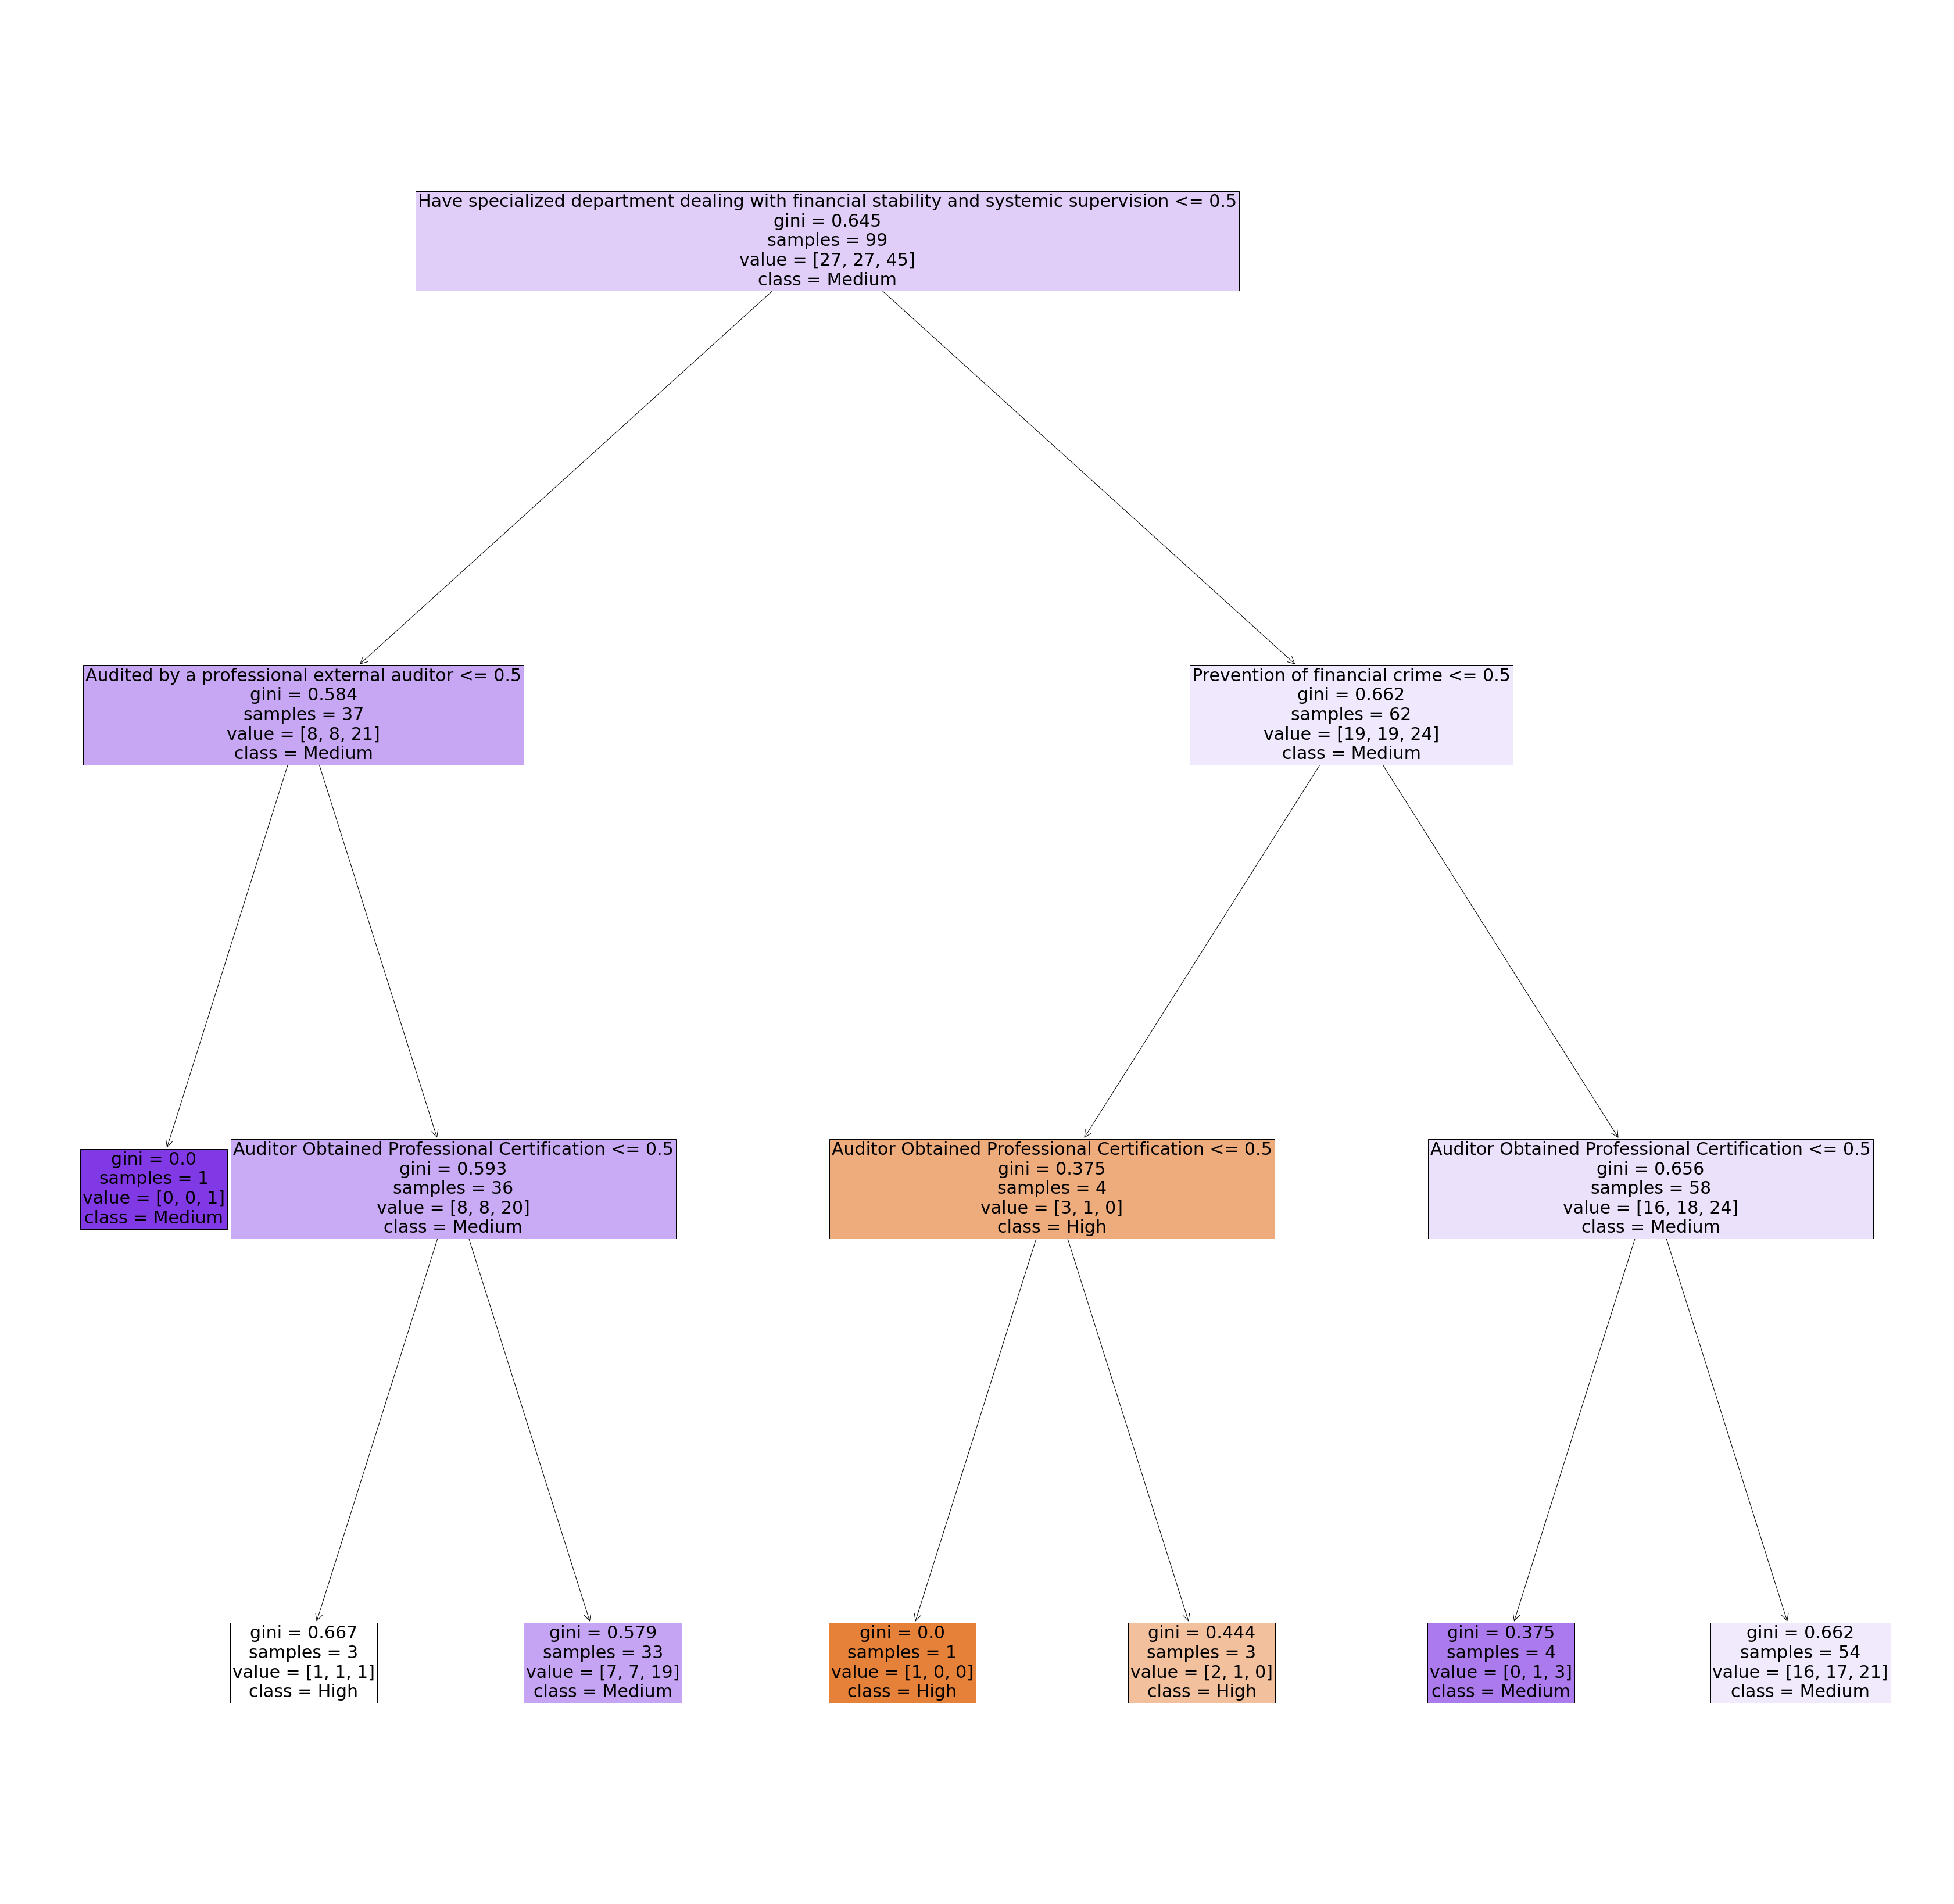

In [ ]:
fig = plt.figure(figsize=(60,60))
_ = tree.plot_tree(tree_model, 
                   feature_names=df_model.columns.to_list()[2:-2],  
                   class_names=df_model['Transaction Amount Level'].values,
                   fontsize=30,
                   filled=True)
plt.savefig('Tree.png')

In [ ]:
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=7, n_jobs=4)
scores

array([0.4       , 0.14285714, 0.35714286, 0.42857143, 0.5       ,
       0.42857143, 0.35714286])

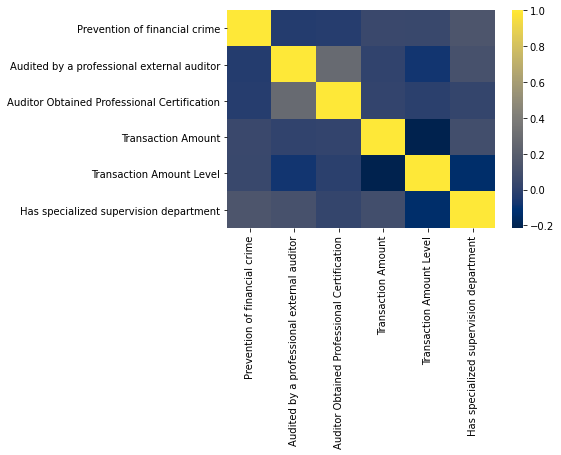

In [ ]:
corr_modelDF = df_model.copy()
encoder = LabelEncoder()
# encoder2 = LabelEncoder()
# value1 = corrDF["Originator_Region"].values
# value2 = corrDF["Benificiary_Region"].values
# value1_encoded = encoder1.fit_transform(value1.astype('str'))   # this "fits" the labels to numerical classes
# value2_encoded = encoder2.fit_transform(value1.astype('str'))   # this "fits" the labels to numerical classes
# corrDF['Originator_Region'] = encoder1.fit_transform(corrDF['Originator_Region'])
# corrDF['Benificiary_Region'] = encoder2.fit_transform(corrDF['Benificiary_Region'])
corr_modelDF['Has specialized supervision department'] =  corr_modelDF['Have specialized department dealing with financial stability and systemic supervision']
corr_modelDF.drop(['Have specialized department dealing with financial stability and systemic supervision'], axis=1, inplace=True)
corr_modelDF['Transaction Amount Level'] = encoder.fit_transform(df_model['Transaction Amount Level'])
sns.heatmap(corr_modelDF.corr(), cmap='cividis')
# df_model